# Data-driven Insights and Sales Prediction for an Online Retail Store

Maties MarketPlace is an online retail store that operates mainly in South Africa and has recently started business internationally. It can be assumed that the data and historic information on the clients was gathered randomly and independently. Data analysis, feature engineering, and regression models are used to build a predictive model to optimize sales. 

## Import libraries and dataset

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
# libraries imported
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import matplotlib.cm as cm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys

from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

%matplotlib inline

We use the `MatiesMarketPlace.csv` dataset as an example. The dataset contains ...  The variables are:
- Sales

In [4]:
df = pd.read_csv("MableMarketplace.csv")
df_temp = df.copy() #copy for EDA
df_pm = df.copy() #copy for linear regression

## Exploratory Data Analysis

### Basic Data Inspection

In [5]:
df.head()

Sales     Month  AgeInMonths  ProfileInMonths Subscribed  NumPrevOrders  \
0  653.29   October          395               18      Daily             11   
1  650.36       May          373                4       None             17   
2  588.88     April          453               15       None             13   
3  616.99  November          409               54       None             42   
4  668.88    August          521                7       None             10   

   AvgSpend  POSR   OPR  Online  ...  ShippingOption Shipping        Country  \
0    162.11   5.4  0.63      61  ...         Premium     Paid   South Africa   
1    189.38   6.1  0.69      22  ...         Express     Paid        England   
2    164.20   7.6  0.55      63  ...        Standard     Paid   South Africa   
3    196.41   5.9  0.77      44  ...         Premium     Free        Belgium   
4    209.05   1.1  0.63      41  ...         Express     Paid  United States   

   Platform         Payment  DayOfWeek Ad_1 Ad_2 Ad_3 SocialMedia  
0  Computer     Credit Card    Tuesday   No  Yes   No        None  
1       iOS  Account Credit    Tuesday   No   No  Yes        None  
2  Computer     Credit Card     Friday   No  Yes   No        None  
3  Computer     Credit Card  Wednesday   No  Yes  Yes        None  
4  Computer     Credit Card     Sunday   No   No  Yes        None  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sales            15000 non-null  float64
 1   Month            15000 non-null  object 
 2   AgeInMonths      15000 non-null  int64  
 3   ProfileInMonths  15000 non-null  int64  
 4   Subscribed       15000 non-null  object 
 5   NumPrevOrders    15000 non-null  int64  
 6   AvgSpend         15000 non-null  float64
 7   POSR             15000 non-null  float64
 8   OPR              15000 non-null  float64
 9   Online           15000 non-null  int64  
 10  Discount         15000 non-null  int64  
 11  ShippingOption   15000 non-null  object 
 12  Shipping         15000 non-null  object 
 13  Country          15000 non-null  object 
 14  Platform         15000 non-null  object 
 15  Payment          15000 non-null  object 
 16  DayOfWeek        15000 non-null  object 
 17  Ad_1        

- More categorical/qualitative columns than numerical/quantitative.
- The response variable - Sales - is numerical.
- No missing data

### Numerical Analysis

#### Feature Transformation 1
- AgeInMonths and ProfileInMonths -> AgeInYears and ProfileInYears respectively for ease of analysis, standard categorization and relatable unit of time when analysing numerical variables.

In [7]:
df_Num = df.select_dtypes(exclude=object)
df_Num['AgeInYears'] = df['AgeInMonths'] // 12
del(df_Num['AgeInMonths'])
df_Num['ProfileInYears'] = df['ProfileInMonths'] // 12
del(df_Num['ProfileInMonths'])
df_Num.describe()

Sales  NumPrevOrders      AvgSpend          POSR           OPR  \
count  15000.000000   15000.000000  15000.000000  15000.000000  15000.000000   
mean     659.569531      25.365733    233.676089      4.431333      0.656929   
std      220.160955      16.258975    112.948936      2.144256      0.250207   
min      384.550000       0.000000      0.000000      0.000000      0.000000   
25%      526.635000      11.000000    174.030000      2.800000      0.570000   
50%      598.010000      26.000000    227.970000      4.600000      0.690000   
75%      713.615000      36.000000    297.850000      6.200000      0.830000   
max     2950.510000      68.000000    823.760000      8.000000      1.000000   

             Online      Discount    AgeInYears  ProfileInYears  
count  15000.000000  15000.000000  15000.000000    15000.000000  
mean      48.242733      3.683467     36.667133        1.819733  
std       15.806047      9.939409      5.050865        1.412104  
min        9.000000      0.000000     25.000000        0.000000  
25%       37.000000      0.000000     33.000000        1.000000  
50%       46.000000      0.000000     36.000000        2.000000  
75%       58.000000      0.000000     41.000000        3.000000  
max      144.000000     45.000000     51.000000        9.000000

#### Univariate Analysis

- Understanding distribution shape and skewness of numerical variables, and if there are variables to be transformed.

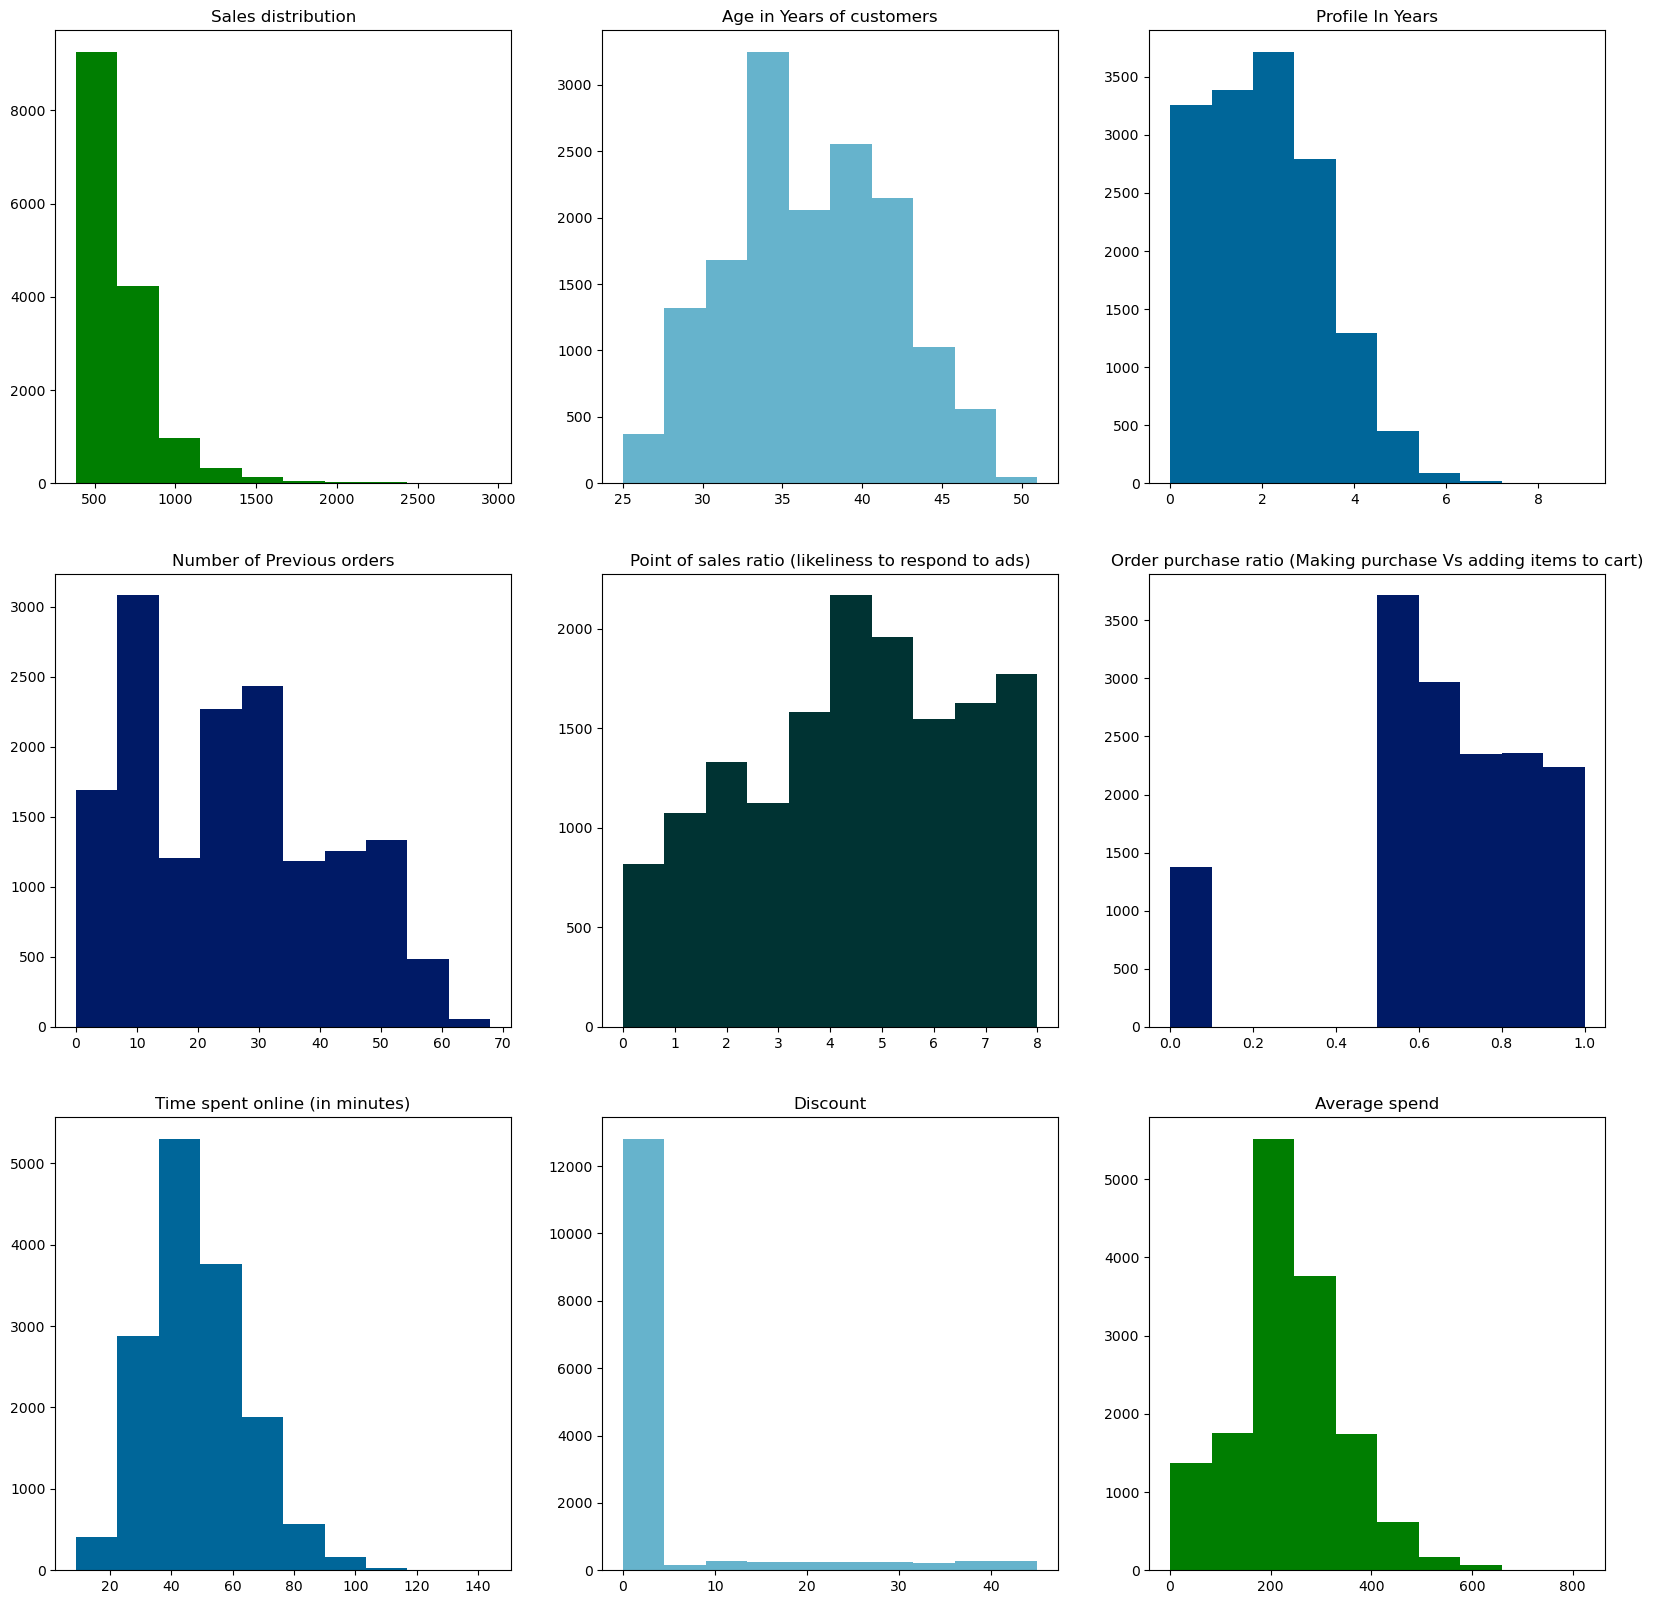

In [8]:
 #Histograms of the numerical variables to see their distributions
 fig, num_dist = plt.subplots(nrows = 3, ncols = 3,figsize=(20,20))

num_dist[0,0].hist(x= 'Sales', data = df_Num, color=plt.cm.ocean(1))
num_dist[0,0].set_title("Sales distribution")

num_dist[0, 1].hist(x= 'AgeInYears', data=df_Num, color=plt.cm.ocean(0.8))
num_dist[0,1].set_title("Age in Years of customers")

num_dist[0, 2].hist(x= 'ProfileInYears', data=df_Num, color=plt.cm.ocean(0.6))
num_dist[0,2].set_title("Profile In Years")

num_dist[1,0].hist(x= 'NumPrevOrders', data=df_Num, color=plt.cm.ocean(0.4))
num_dist[1,0].set_title("Number of Previous orders")

num_dist[1,1].hist(x= 'POSR', data=df_Num, color=plt.cm.ocean(0.2))
num_dist[1,1].set_title("Point of sales ratio (likeliness to respond to ads)")

num_dist[1,2].hist(x= 'OPR', data=df_Num, color=plt.cm.ocean(0.4))
num_dist[1,2].set_title("Order purchase ratio (Making purchase Vs adding items to cart)")

num_dist[2,0].hist(x= 'Online', data=df_Num, color=plt.cm.ocean(0.6))
num_dist[2,0].set_title("Time spent online (in minutes)")

num_dist[2,1].hist(x= 'Discount', data=df_Num, color=plt.cm.ocean(0.8))
num_dist[2,1].set_title("Discount")

num_dist[2,2].hist(x= 'AvgSpend', data=df_Num, color=plt.cm.ocean(1))
num_dist[2,2].set_title("Average spend")

plt.show()   

- Response variable Sales is skewed to the right, mean will not be a best measure of central tendency as there are outliers at play. 

#### Pearson Correlation

<Axes: >

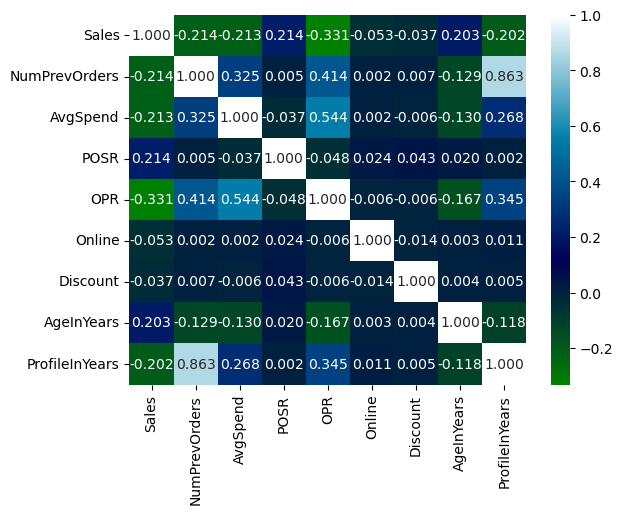

In [9]:
#General correlation matrix
my_corr_maties_num = df_Num.corr()
sns.heatmap(my_corr_maties_num, cmap='ocean', annot=True, fmt = ".3f")

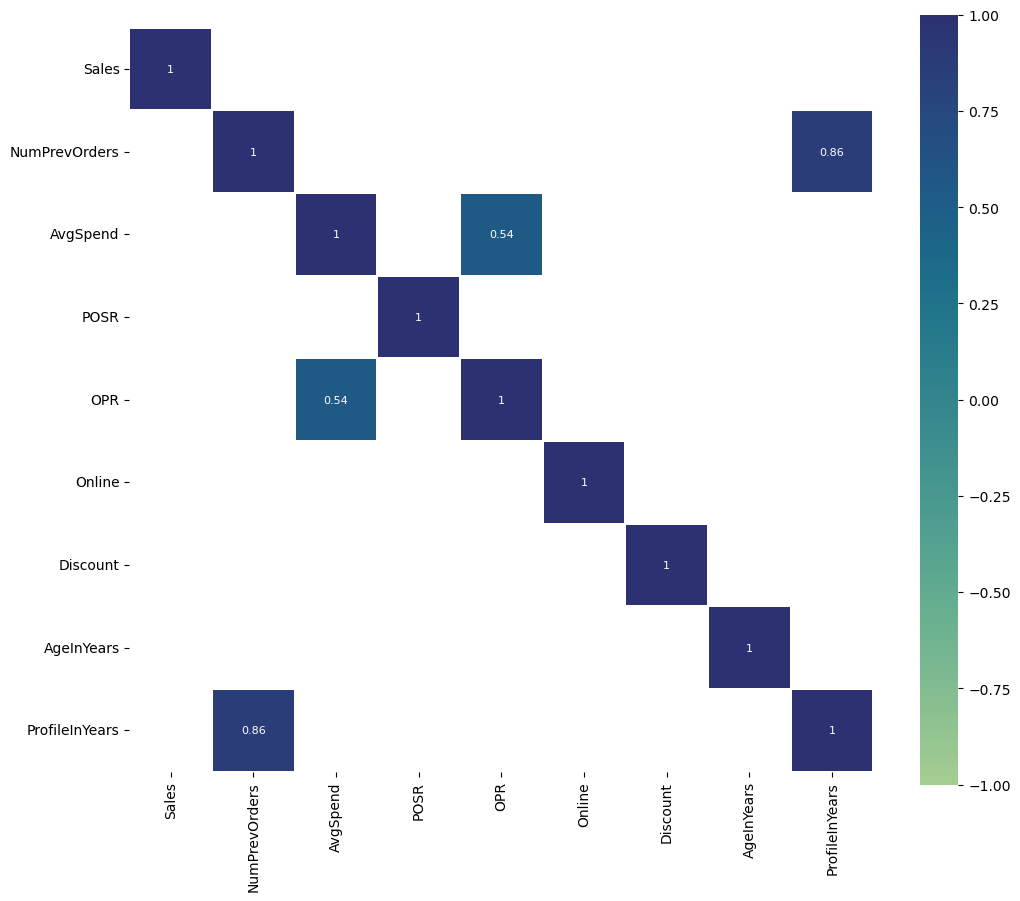

In [10]:
#Only show moderate to strong correlations for the numerical variables
my_corr_maties_num
plt.figure(figsize=(12, 10))
sns.heatmap(my_corr_maties_num[(my_corr_maties_num >= 0.5) | (my_corr_maties_num<= -0.5)], 
            cmap='crest', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


- Response variable Sales does not have a strong linear relationship with other variables. 
- OPR and AvgSpend are mildly correlated.
- NumPrevOrders and ProfileInYears have a strong positive linear relationship, suggesting multicollinearity. Further investigation will be done using Variance Inflation Factor VIF.

#### Scatterplots of correlated numerical variables
- To find linear or nonlinear relationships between Sales and other variables
- To find potential key predictors

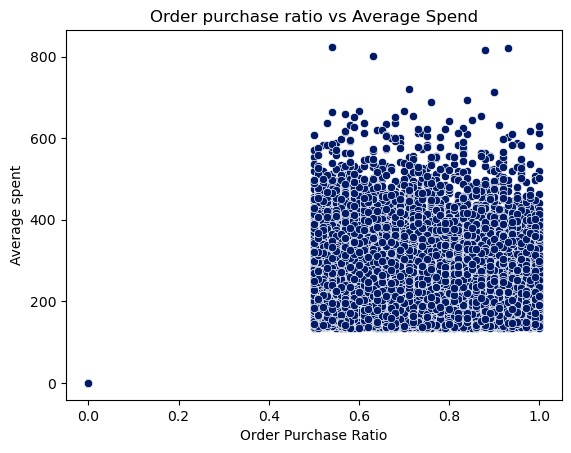

In [11]:
sns.scatterplot(data=df_Num , x = 'OPR', y = 'AvgSpend', color=plt.cm.ocean(0.4))
plt.title("Order purchase ratio vs Average Spend")
plt.ylabel("Average spent")
plt.xlabel("Order Purchase Ratio")
plt.show()

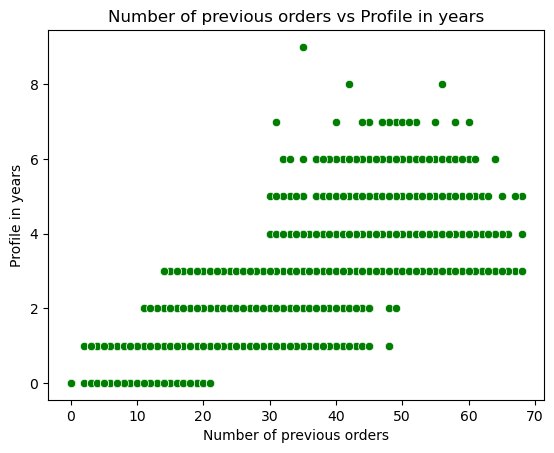

In [12]:
sns.scatterplot(data=df_Num  , x = 'NumPrevOrders', y = 'ProfileInYears', color=plt.cm.ocean(1))
plt.title("Number of previous orders vs Profile in years")
plt.ylabel("Profile in years")
plt.xlabel("Number of previous orders")
plt.show()

- The relationship between the number of previous orders a customer has and their profile in year is a positive horizontal stripe pattern, becayse the profile in years is a discrete variable. 

#### Scatterplots of all numeric variables

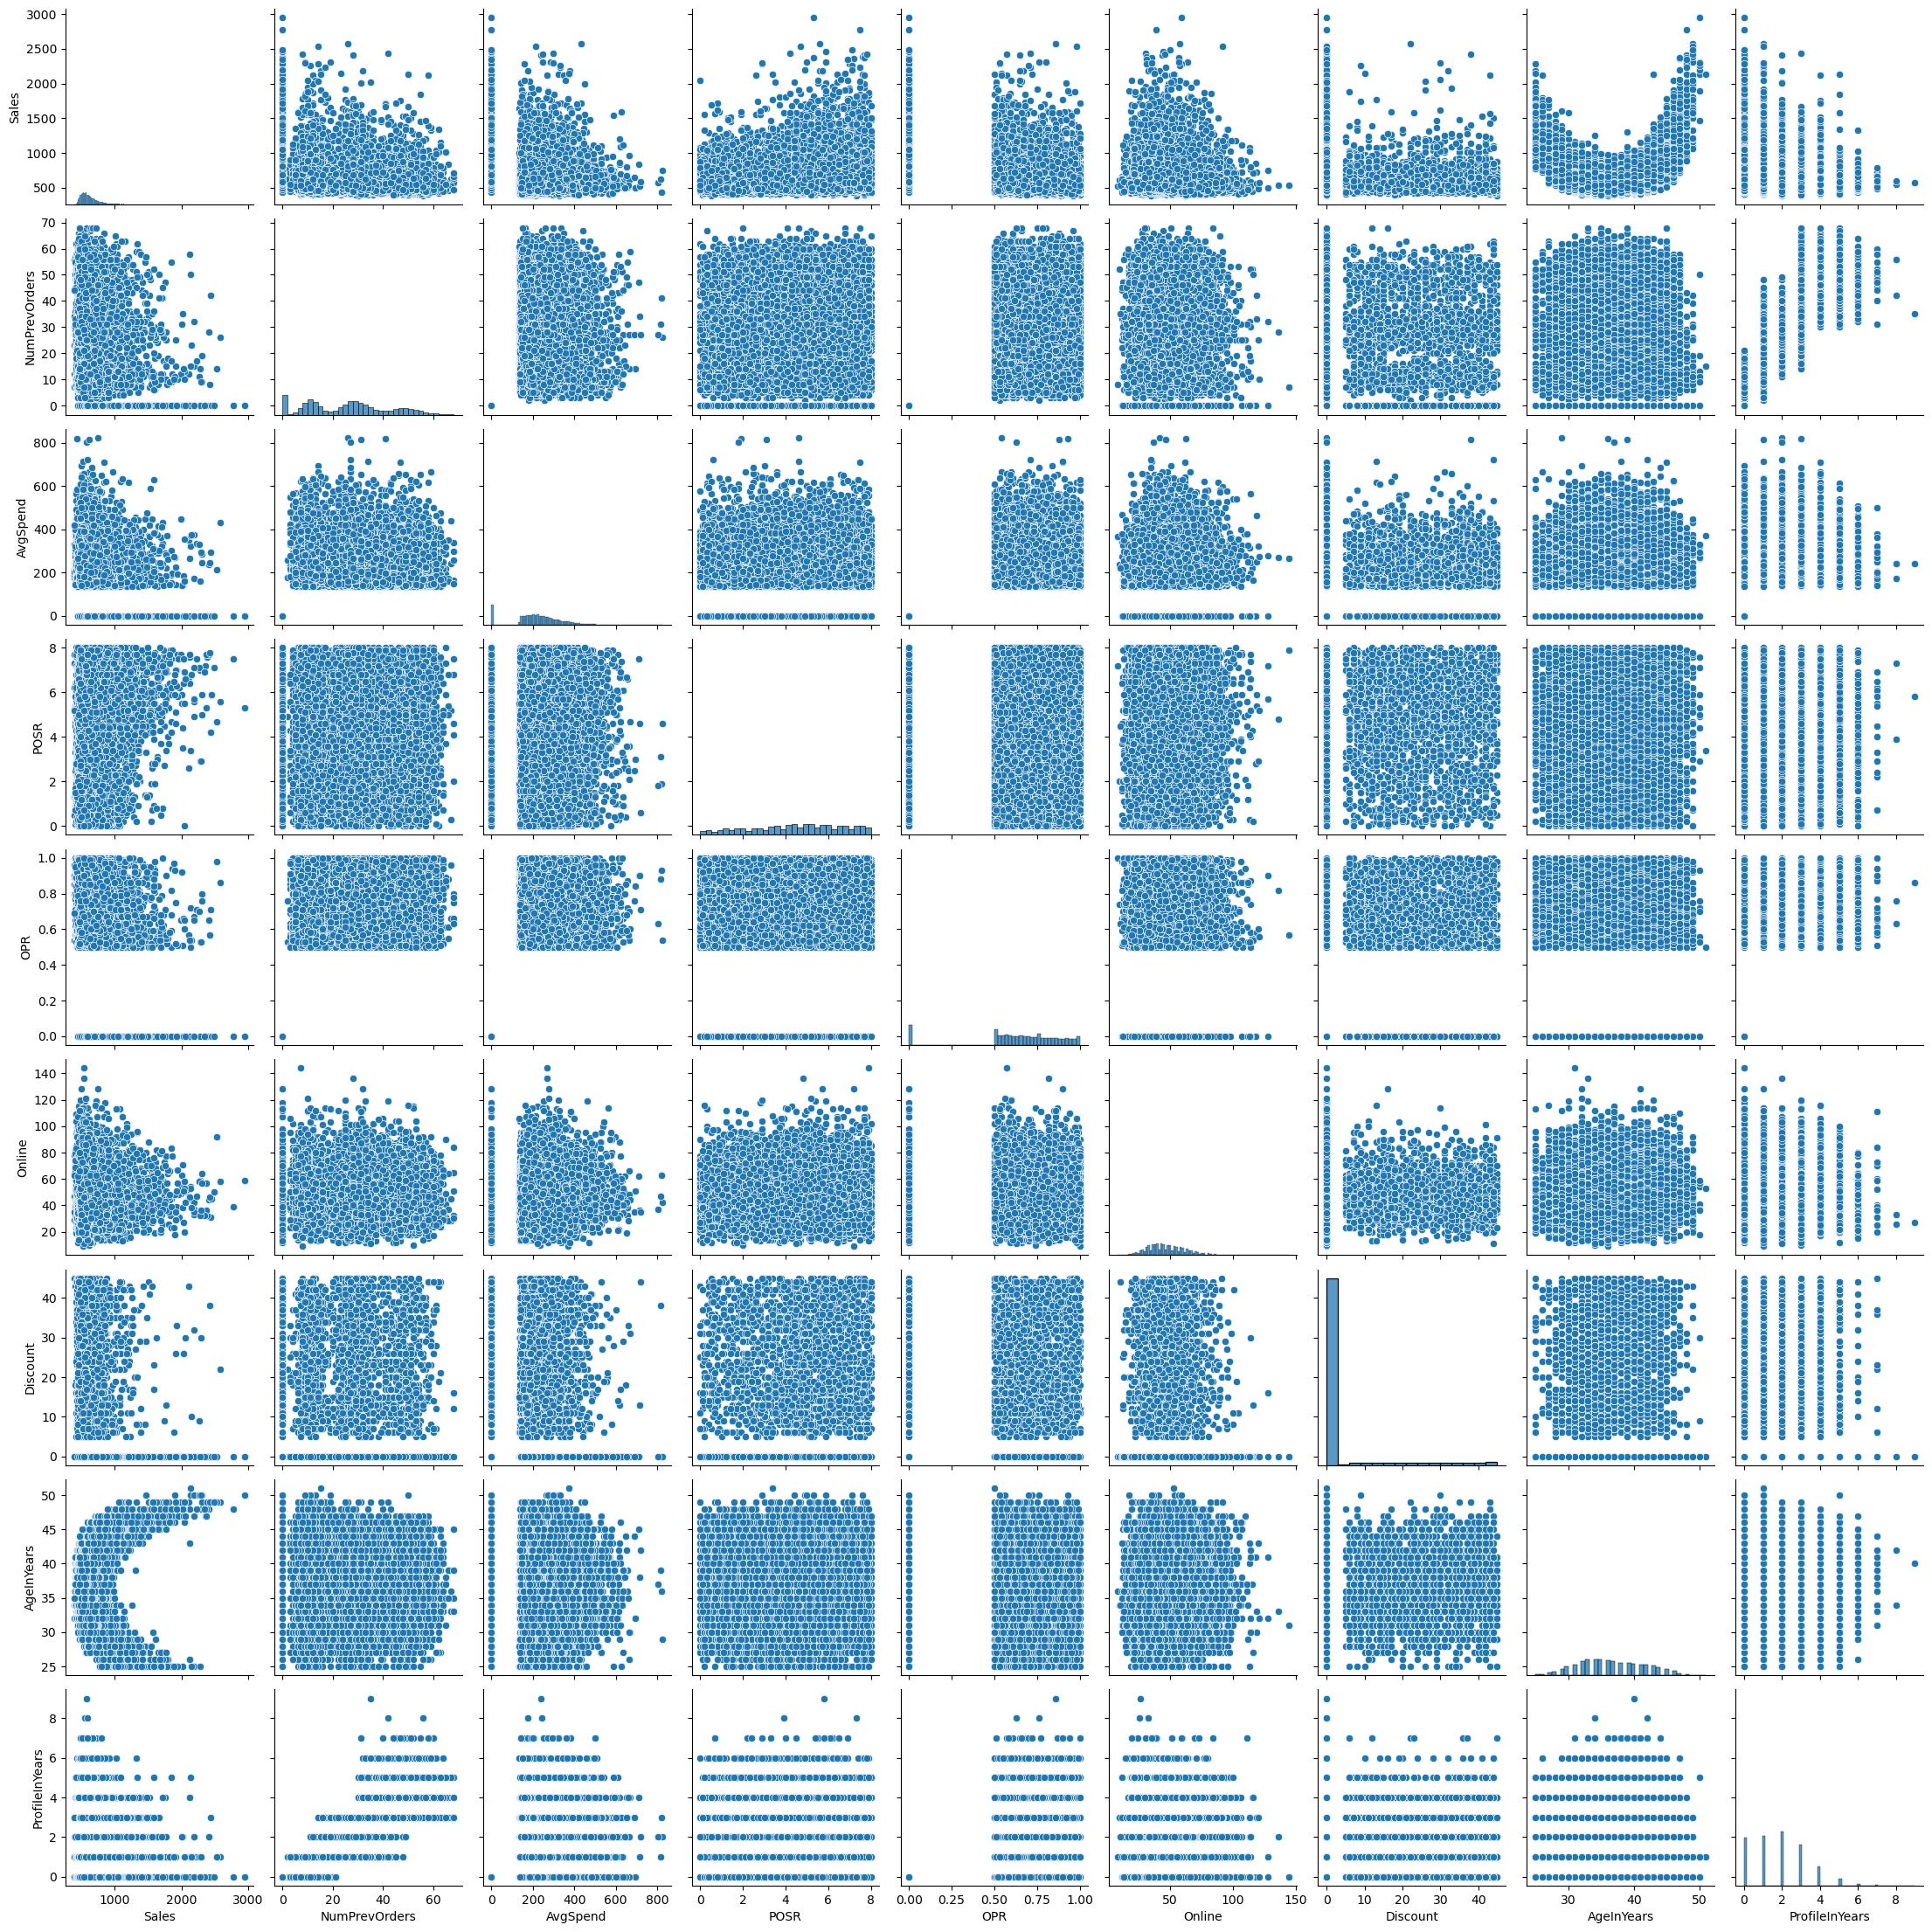

In [13]:
sns.pairplot(df_Num)

The graphs below look at the relationship between Sales and potential key predictors. 

Text(0.5, 1.0, ' Sales and OPR')

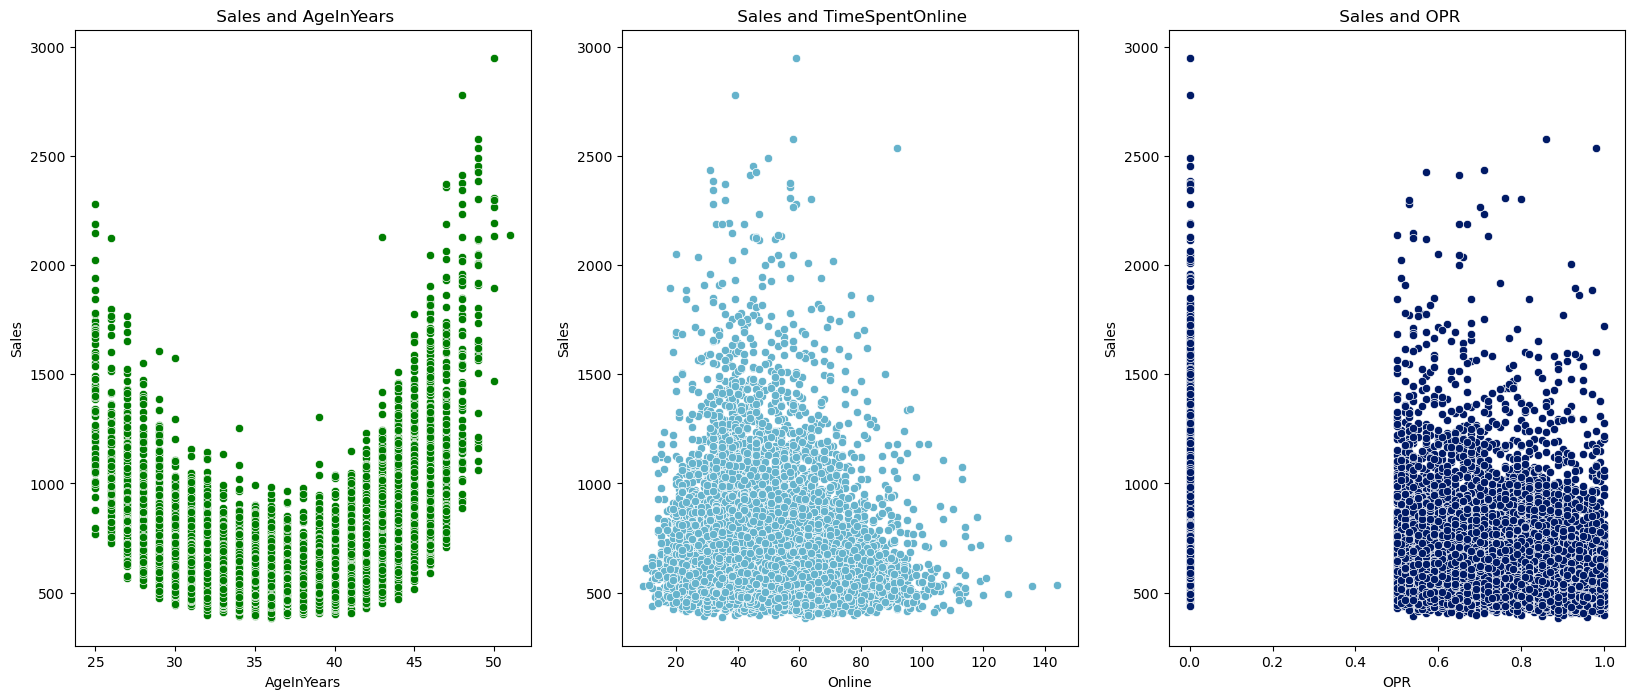

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))

sns.scatterplot(data = df_Num, y = 'Sales', x = 'AgeInYears', ax = axes[0], color=plt.cm.ocean(1))
axes[0].set_title(" Sales and AgeInYears")

sns.scatterplot(data = df_Num, y = 'Sales', x = 'Online', ax = axes[1], color=plt.cm.ocean(0.8))
axes[1].set_title(" Sales and TimeSpentOnline")

sns.scatterplot(data = df_Num, y = 'Sales', x = 'OPR', ax = axes[2], color=plt.cm.ocean(0.4))
axes[2].set_title(" Sales and OPR")

- Sales and AgeInYears have a quadratic (non-linear) relationship - Dependents (young and old) will typically have lesss to spend as they may not be finacnially independent. A transformation may have to be done on AgeInYears.
- Sales and the time spent Online is clustered to the left, however the data points are scattered all over, indicating a weak relationship.
- Sales and OPR is clustered to the right, however the cluster is scattered indicating a weak relationship. There is a vertical stipe pattern, representing the discreteness of not having an OPR score.

#### Quadratic Regression Model
Sales and AgeInYears have a quadratic relationship so a quadratic regression model will be fit

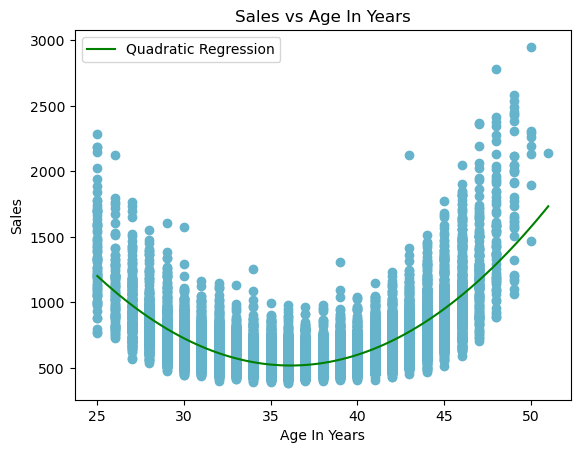

In [15]:
# Fit a quadratic regression model
coefficients = np.polyfit(df_Num['AgeInYears'], df_Num['Sales'], 2)  # Fit a quadratic (degree 2) polynomial

# Create a function to represent the quadratic regression line
quadratic_fit = np.poly1d(coefficients)

# Generate points for the regression line
x_regression = np.linspace(min(df_Num['AgeInYears']), max(df_Num['AgeInYears']), 100)
y_regression = quadratic_fit(x_regression)

# Plot the original data points
plt.scatter(df_Num["AgeInYears"], df_Num['Sales'], color=plt.cm.ocean(0.8) )

# Plot the quadratic regression line
plt.plot(x_regression, y_regression, label='Quadratic Regression', color='green')

# Add labels and legend
plt.xlabel('Age In Years')
plt.ylabel('Sales')
plt.title('Sales vs Age In Years')
plt.legend()

# Show the plot
plt.show()


### Categorical Analysis

#### Univariate Analysis

In [16]:
#Categorical variables summaries
df_Cat = df.select_dtypes(include=object)
df_Cat.describe()

Month Subscribed ShippingOption Shipping       Country  Platform  \
count   15000      15000          15000    15000         15000     15000   
unique     12          4              3        2            14         3   
top       May       None        Express     Paid  South Africa  Computer   
freq     1332      10898           5875    13014          6552     11235   

            Payment DayOfWeek   Ad_1   Ad_2   Ad_3 SocialMedia  
count         15000     15000  15000  15000  15000       15000  
unique            4         7      2      2      2           4  
top     Credit Card  Saturday     No    Yes    Yes        None  
freq           9833      3361   8960   7973   8781        8960

- Highest spending month is May
- Most orders are local
- Most transactions occur on a Saturday (weekend)

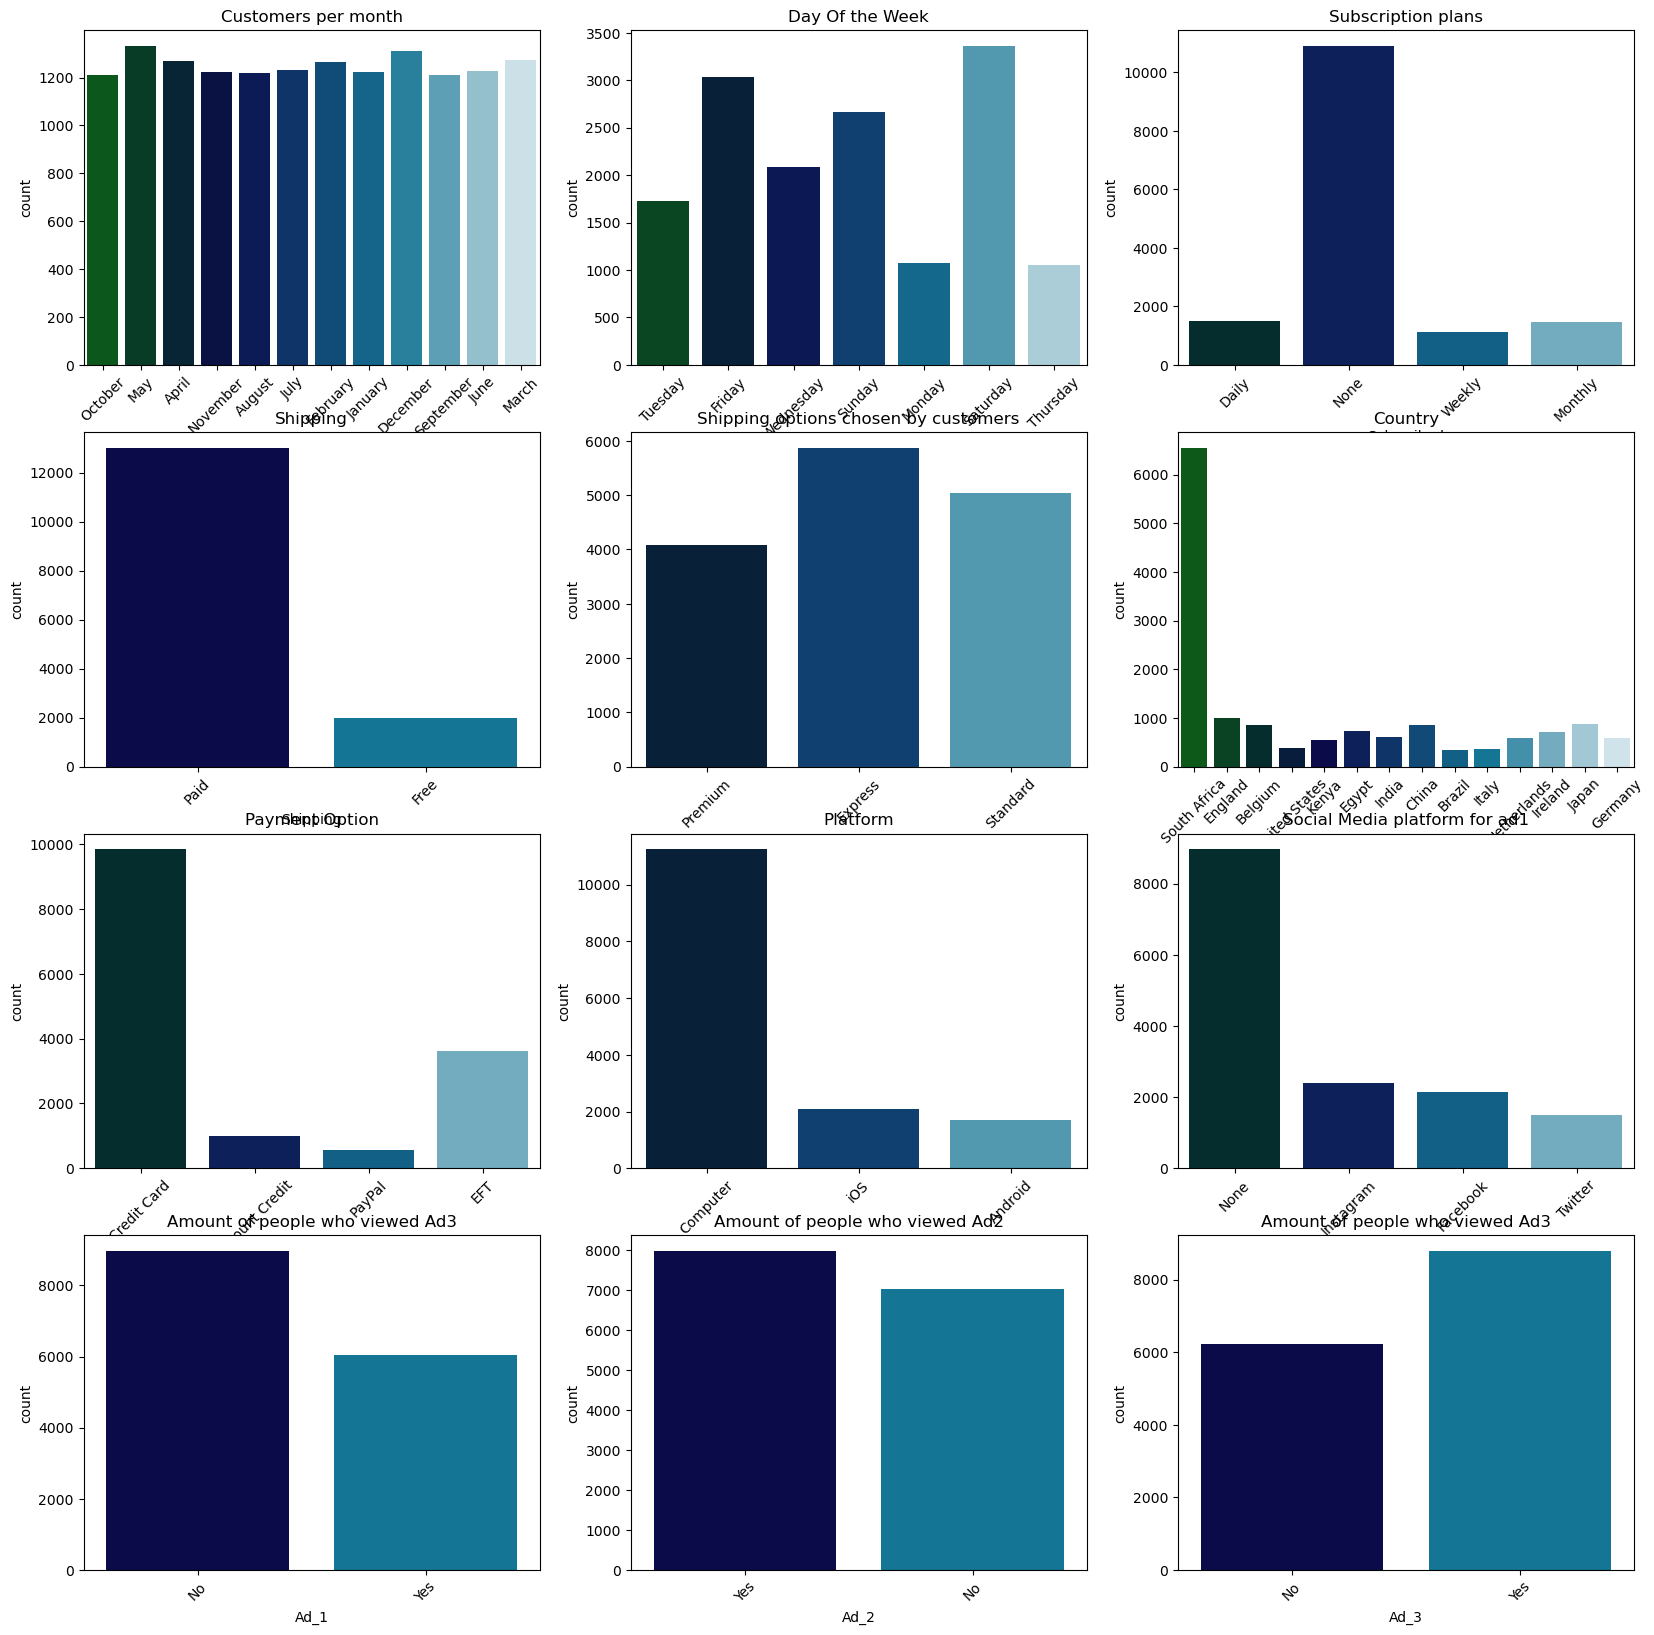

In [18]:
fig, cat_dist = plt.subplots(nrows = 4, ncols = 3,figsize=(20,20))
# Temporary view, I just want everything at one place so that I can veiw them properly 

sns.countplot(x= "Month",data =df_Cat , ax=cat_dist[0,0], palette = 'ocean').set(title="Customers per month")
cat_dist[0,0].set_xticklabels(cat_dist[0,0].get_xticklabels(),rotation=45)

sns.countplot(x= "Subscribed", data = df_Cat, ax=cat_dist[0,2], palette = 'ocean').set(title="Subscription plans")
cat_dist[0,2].set_xticklabels(cat_dist[0,2].get_xticklabels(),rotation=45)

sns.countplot(x= "ShippingOption",data = df_Cat, ax=cat_dist[1,1], palette = 'ocean').set(title="Shipping options chosen by customers")
cat_dist[1,1].set_xticklabels(cat_dist[1,1].get_xticklabels(),rotation=45)

sns.countplot(x= "Shipping",data = df_Cat, ax=cat_dist[1,0], palette = 'ocean').set(title="Shipping")
cat_dist[1,0].set_xticklabels(cat_dist[1,0].get_xticklabels(),rotation=45)

sns.countplot(x= "Country",data = df_Cat, ax=cat_dist[1,2], palette = 'ocean').set(title="Country")
cat_dist[1,2].set_xticklabels(cat_dist[1,2].get_xticklabels(),rotation=45)

sns.countplot(x= "DayOfWeek",data = df_Cat, ax=cat_dist[0,1], palette = 'ocean').set(title="Day Of the Week")
cat_dist[0,1].set_xticklabels(cat_dist[0,1].get_xticklabels(),rotation=45)

sns.countplot(x= "Platform",data = df_Cat, ax=cat_dist[2,1], palette = 'ocean').set(title="Platform")
cat_dist[2,1].set_xticklabels(cat_dist[2,1].get_xticklabels(),rotation=45)

sns.countplot(x= "Payment",data = df_Cat, ax=cat_dist[2,0], palette = 'ocean').set(title="Payment Option")
cat_dist[2,0].set_xticklabels(cat_dist[2,0].get_xticklabels(),rotation=45)

sns.countplot(x= "SocialMedia",data = df_Cat, ax=cat_dist[2,2], palette = 'ocean').set(title="Social Media platform for ad1")
cat_dist[2,2].set_xticklabels(cat_dist[2,2].get_xticklabels(),rotation=45)

sns.countplot(x= "Ad_1",data = df_Cat, ax=cat_dist[3,0], palette = 'ocean').set(title="Amount of people who viewed Ad3")
cat_dist[3,0].set_xticklabels(cat_dist[3,0].get_xticklabels(),rotation=45)

sns.countplot(x= "Ad_2",data = df_Cat, ax=cat_dist[3,1], palette = 'ocean').set(title="Amount of people who viewed Ad2")
cat_dist[3,1].set_xticklabels(cat_dist[3,1].get_xticklabels(),rotation=45)

sns.countplot(x= "Ad_3",data = df_Cat, ax=cat_dist[3,2], palette = 'ocean').set(title="Amount of people who viewed Ad3")
cat_dist[3,2].set_xticklabels(cat_dist[3,2].get_xticklabels(),rotation=45)
plt.show()

#### Average Sales by Day of the Week

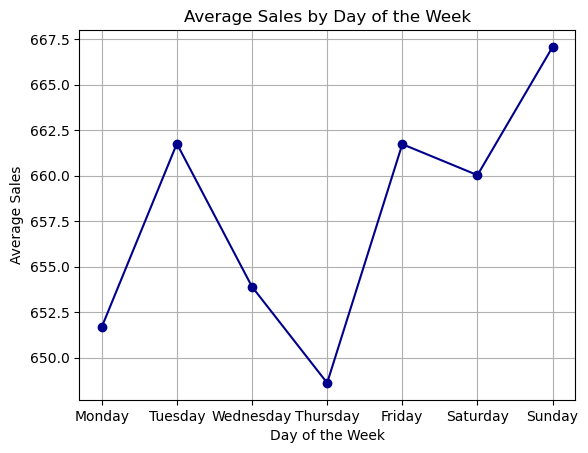

In [19]:
custom_order1 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories = custom_order1, ordered=True)

day_trend = df.groupby('DayOfWeek')['Sales'].mean()
plt.plot(day_trend.index, day_trend.values, marker='o', color = 'darkblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.title('Average Sales by Day of the Week')
plt.grid(True)
plt.show()

- Although Sunday has the highest average sales of all the days of the week

#### Average Sales per Month

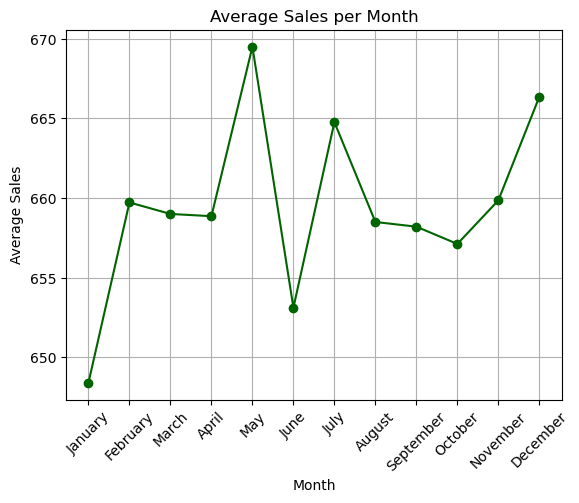

In [20]:
custom_order2 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories = custom_order2, ordered=True)

month_trend = df.groupby('Month')['Sales'].mean()
plt.plot(month_trend.index, month_trend.values, marker='o', color = 'darkgreen')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


- Highest average sales is in May, followed by December and June
- January and June perform poorly compared to other months

#### Ad use against Sales
- Investigating the effect of different ads on Sales
- How does mean sales change per ad use? Or without the use of ads?

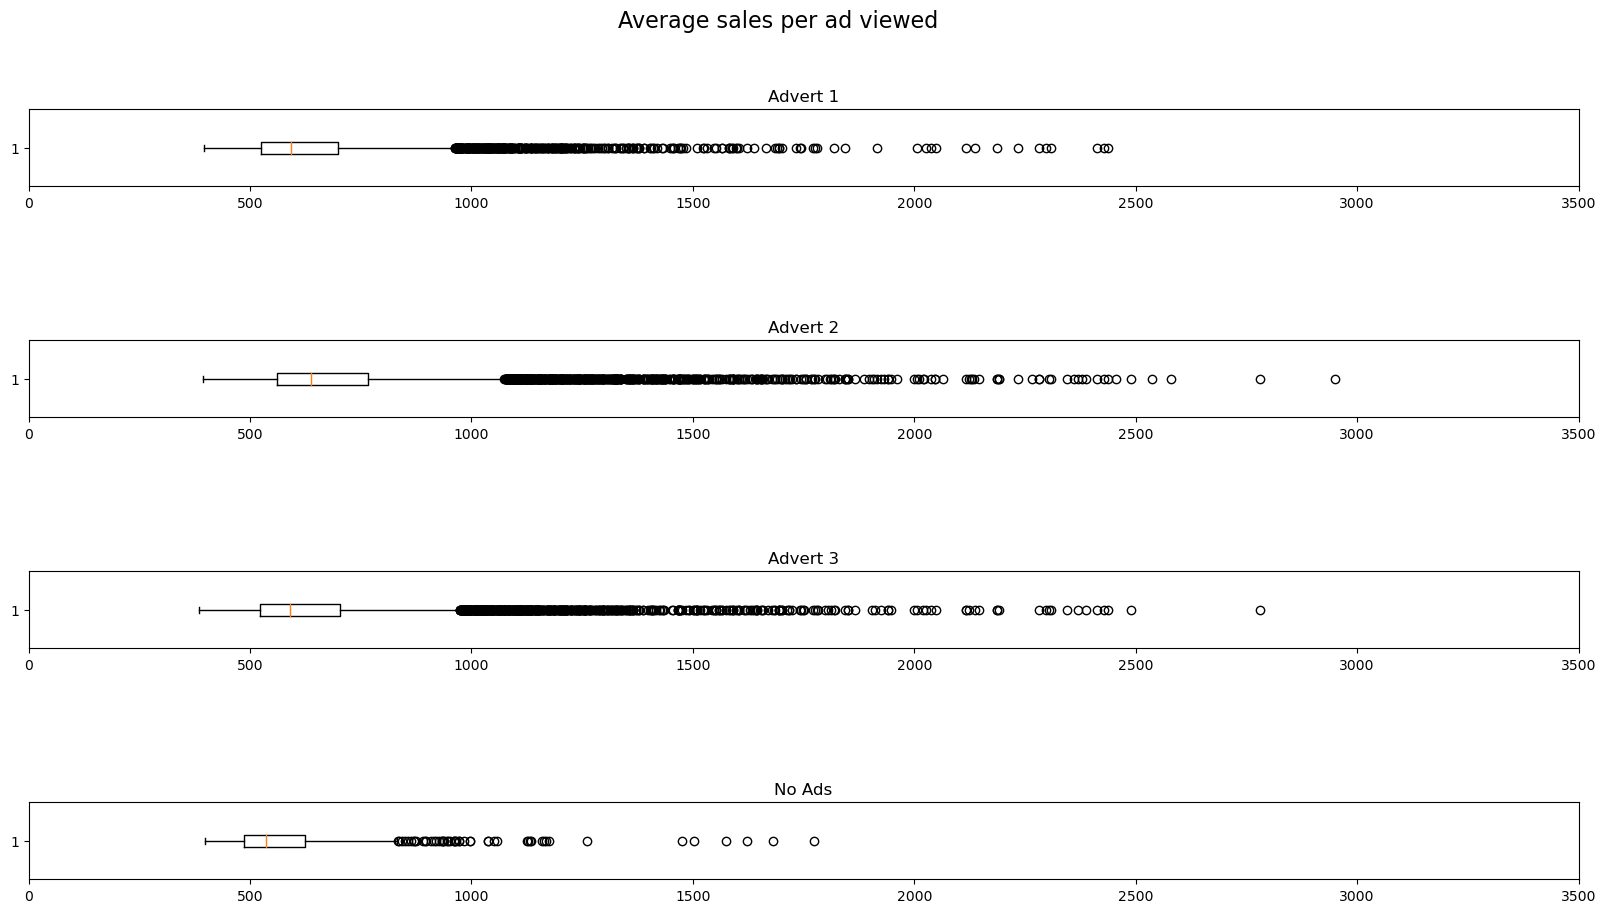

In [21]:
# How did the different adverts impact sales?
fig, ad_sales = plt.subplots(nrows = 4, ncols = 1,figsize=(20,10))
df_ad1 = df[-(df.Ad_1 == "No")]


ad_sales[0].boxplot(x='Sales', data = df[-(df.Ad_1 == "No")], vert=False)
ad_sales[1].boxplot(x='Sales', data = df[-(df.Ad_2 == "No")], vert=False)
ad_sales[2].boxplot(x='Sales', data = df[-(df.Ad_3 == "No")], vert=False)


ad_sales[0].set_title("Advert 1")
ad_sales[1].set_title("Advert 2")
ad_sales[2].set_title("Advert 3")
ad_sales[3].set_title("No Ads")
# Subsetting data where no person received adverts, how were they affected? 
df_no_ad = df[(df.Ad_1 == 'No') & (df.Ad_2 == 'No') & (df.Ad_3 == 'No')]
ad_sales[3].boxplot(x='Sales', data = df_no_ad, vert=False)

fig.suptitle("Average sales per ad viewed", fontsize = 16)
ad_sales[0].set_xlim(0,3500)
ad_sales[1].set_xlim(0,3500)
ad_sales[2].set_xlim(0,3500)
ad_sales[3].set_xlim(0,3500)
plt.subplots_adjust(hspace = 2)
#plt.tight_layout()
plt.show()


# Is there a better way of visualising or getting a numerical values of these adverts?
# place the numerical values of the graph, or use plotly express

In [22]:
# Having a numerical description of the above
data = {'Ad 1'  : df[df.Ad_1 == 'Yes']['Sales'],
        'Ad 2'  : df[df.Ad_2 == 'Yes']['Sales'],
        'Ad 3'  : df[df.Ad_3 == 'Yes']['Sales'],
        'No ads': df[(df.Ad_1 == 'No') & (df.Ad_2 == 'No') & (df.Ad_3 == 'No')]['Sales']}

ads_data = pd.DataFrame(data)
ads_data.describe()

Ad 1         Ad 2         Ad 3       No ads
count  6040.000000  7973.000000  8781.000000   727.000000
mean    645.682321   710.240322   651.325789   586.134856
std     197.732205   248.767594   217.292764   166.913058
min     395.760000   394.280000   384.550000   398.140000
25%     523.847500   561.190000   521.960000   485.900000
50%     591.675000   638.600000   589.840000   536.300000
75%     698.962500   766.190000   702.750000   625.120000
max    2437.410000  2950.510000  2779.490000  1773.230000

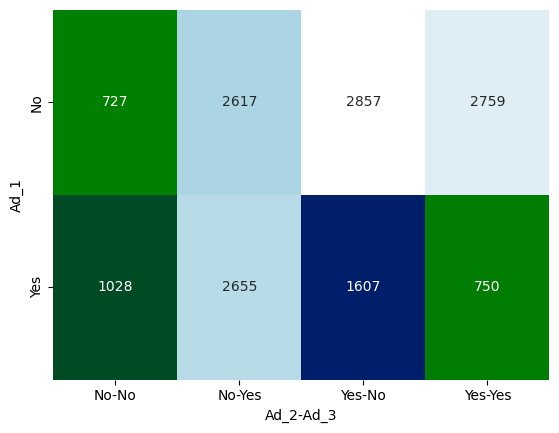

In [23]:
sns.heatmap(pd.crosstab(df_Cat.Ad_1, [df_Cat.Ad_2, df_Cat.Ad_3]),
         annot=True, cbar = False, cmap = 'ocean', 
            fmt="g")
plt.show()

- Average sales from box plots and summary statistics does not vary a lot.
- Boxplots reveal outliers - Sales is skewed.
- More customers view Ad_2 without Ad_1 and Ad_3.
- Fewer customers make purchases without having viewed any of the ads.


#### Ad performance in different countries

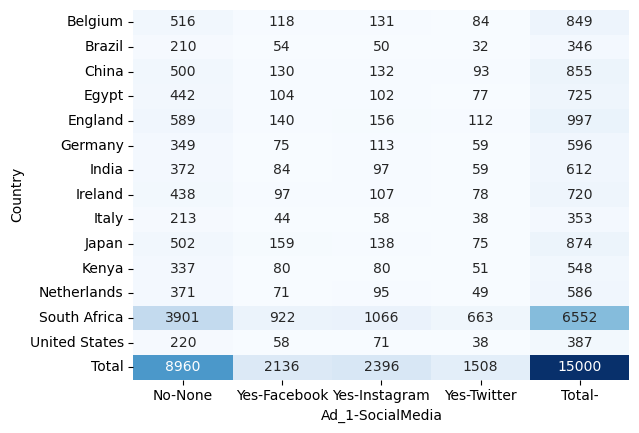

In [24]:
#Heatmap showing the relationship between payment and Ad_1 with respect to social media
sns.heatmap(pd.crosstab(df_Cat.Country, [df_Cat.Ad_1, df_Cat.SocialMedia],
           rownames = ["Country"], colnames = ["Ad_1","SocialMedia"], margins = True, margins_name = "Total"),
            cmap="Blues", annot=True, cbar = False, fmt="g")
plt.show()

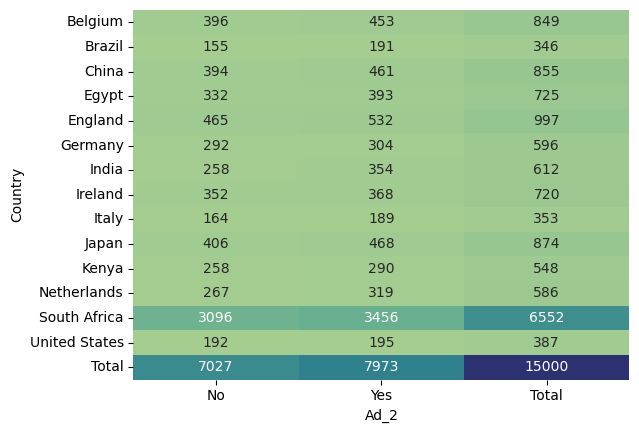

In [25]:
#Heatmap showing the relationship between country and Ad_2
sns.heatmap(pd.crosstab(df_Cat.Country, [df_Cat.Ad_2],
           rownames = ["Country"], colnames = ["Ad_2"], margins = True, margins_name = "Total"),
            cmap="crest", annot=True, cbar = False, fmt="g")
plt.show()

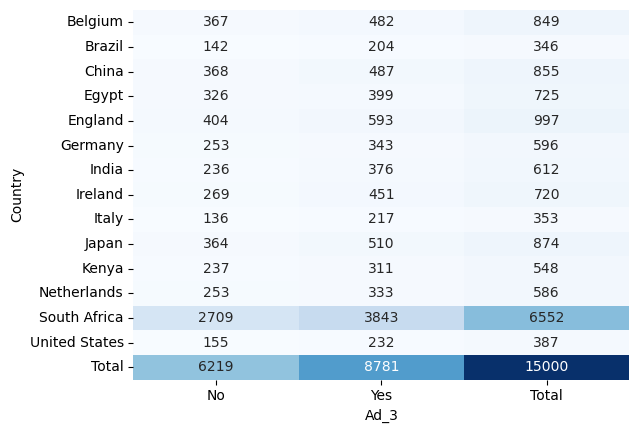

In [26]:
#Heatmap showing the relationship between country and Ad_3
sns.heatmap(pd.crosstab(df_Cat.Country, [df_Cat.Ad_3],
           rownames = ["Country"], colnames = ["Ad_3"], margins = True, margins_name = "Total"),
            cmap="Blues", annot=True, cbar = False, fmt="g")
plt.show()

- The country with the highest viewership of the ads is South Africa.
- Instagram is the social media platform with the highest viewership
- Ad_3 is the most effective out of the 3 (with highest number of customers buying after having come across it) 

#### Feature Transformation 2: Group Age
Grouped the ages to be able to better 'understand' how it would be able to relate to other variables

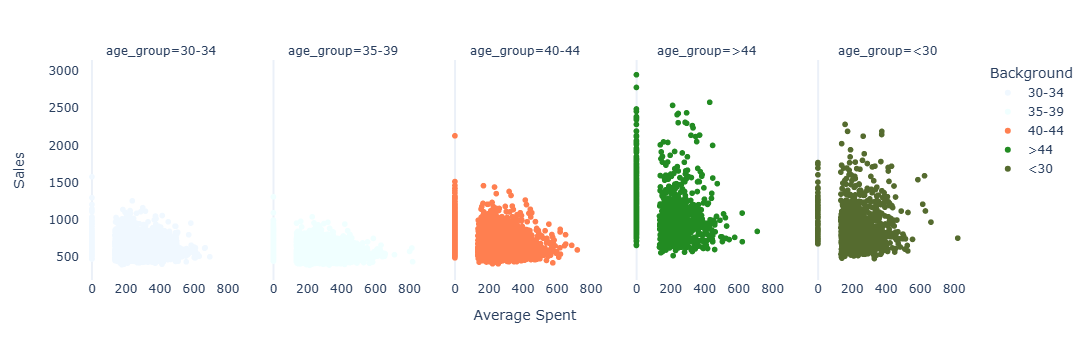

In [72]:
bins = [0,30,35,40,45,100]
labels = ["<30", "30-34","35-39","40-44",">44"]
palette = ["#69d"]

df_temp['age_group'] = pd.cut(df_Num['AgeInYears'], bins=bins, labels=labels, right=False)


# Using facet_col arguments to create Sub plots
fig = px.scatter(df_temp, x="AvgSpend", y="Sales", facet_col="age_group", color="age_group", 
                 color_discrete_sequence = ['aliceblue', 'azure', 'coral', 'forestgreen', 'darkolivegreen'], template = "plotly_white")
# Hide grid lines
fig.update_xaxes(showgrid=False, title="")
fig.update_yaxes(showgrid=False)
fig.update_layout(legend_title_text="Background", xaxis3=dict(title="Average Spent"))
fig.show()

- Customers 40>=n spend  more money than others

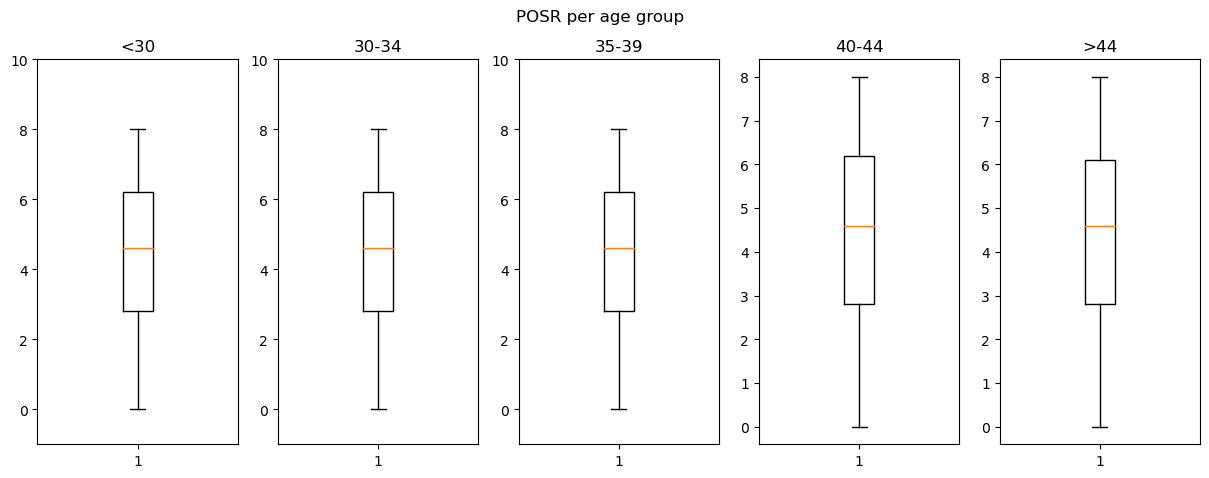

In [73]:
fig, ads_POSR = plt.subplots(nrows = 1, ncols = 5,figsize=(15,5))


ads_POSR[0].boxplot(x='POSR', data = df_temp[-(df_temp.age_group== "<30")], vert=True)
ads_POSR[1].boxplot(x='POSR', data = df_temp[-(df_temp.age_group == "30-34")], vert=True)
ads_POSR[2].boxplot(x='POSR', data = df_temp[-(df_temp.age_group == "35-39")], vert=True)
ads_POSR[3].boxplot(x='POSR', data = df_temp[-(df_temp.age_group == "40-44")], vert=True)
ads_POSR[4].boxplot(x='POSR', data = df_temp[-(df_temp.age_group == ">44")], vert=True)


ads_POSR[0].set_title("<30")
ads_POSR[1].set_title("30-34")
ads_POSR[2].set_title("35-39")
ads_POSR[3].set_title("40-44")
ads_POSR[4].set_title(">44")

fig.suptitle("POSR per age group")
ads_POSR[0].set_ylim(-1,10)
ads_POSR[1].set_ylim(-1,10)
ads_POSR[2].set_ylim(-1,10)
plt.show()




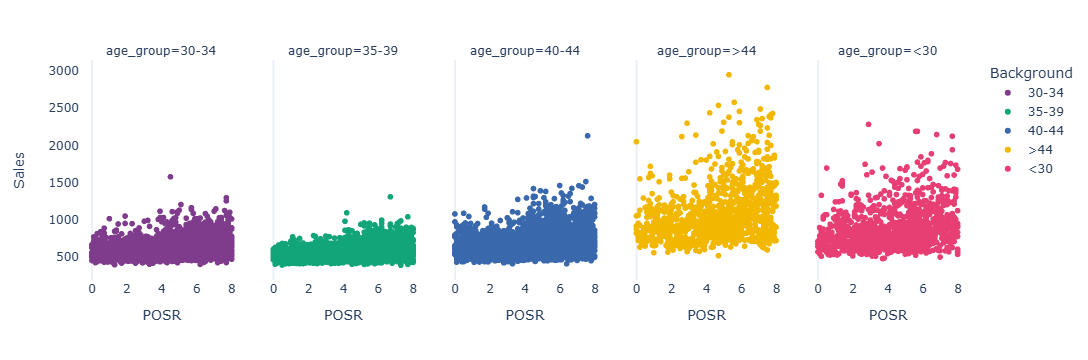

In [74]:
fig = px.scatter(df_temp, x="POSR", y="Sales" ,color="age_group", facet_col='age_group',
                 color_discrete_sequence = px.colors.qualitative.Bold, template = "plotly_white")

fig.update_xaxes(showgrid=False, title="POSR")
fig.update_yaxes(showgrid=False)
fig.update_layout(legend_title_text="Background", xaxis2=dict(title="POSR"))
fig.show()

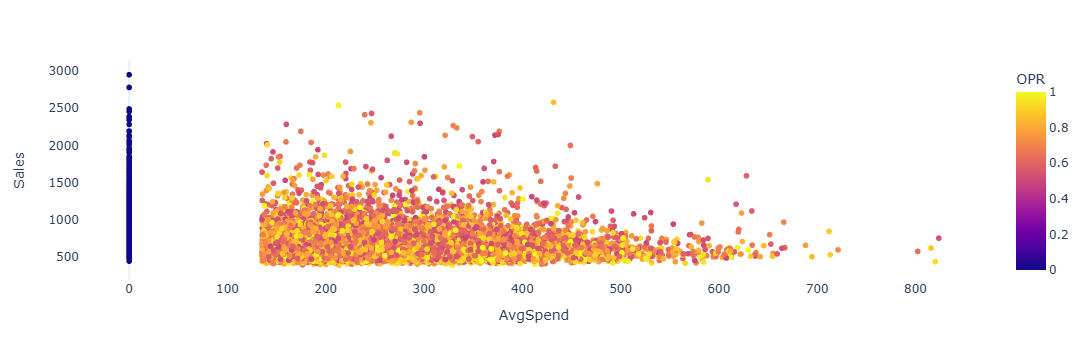

In [40]:
# Average spend and sales with respect to order purchase rate
fig = px.scatter(df_temp, x="AvgSpend", y="Sales", color="OPR", 
                 color_discrete_sequence = px.colors.qualitative, template = "plotly_white")
# Hide grid lines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(legend_title_text="Background", xaxis2=dict(title="NumPrevOrders"))
fig.show()

Customers of the different age groups have the same Point-of-Sales Ratio.

#### Shipping against Sales

Most purchases are on paid shipping ( makes sense since Maties Marketplace does international orders)

Shipping option premium has the highest mean sales out of all the shipping options

In [78]:
df.groupby(['ShippingOption','Shipping'])['Sales'].describe()

count        mean         std     min       25%  \
ShippingOption Shipping                                                     
Express        Free       574.0  680.976254  238.874708  415.19  537.5975   
               Paid      5301.0  653.908589  214.246147  384.55  524.2500   
Premium        Free       110.0  666.772909  205.408206  429.65  515.5500   
               Paid      3971.0  672.640818  229.601084  387.66  532.5050   
Standard       Free      1302.0  648.019017  226.052913  403.82  518.9975   
               Paid      3742.0  654.241235  212.719412  395.76  526.0325   

                             50%       75%      max  
ShippingOption Shipping                              
Express        Free      622.815  740.9950  2437.41  
               Paid      592.640  708.0600  2579.60  
Premium        Free      591.440  756.2475  1654.57  
               Paid      609.400  725.3800  2950.51  
Standard       Free      582.175  696.4500  2779.49  
               Paid      595.175  706.6175  2428.87

Most purchases uses express as their shipping option and also expess has the highest mean sales when its free shipping out of all the other shipping options.

#### Email listings

In [81]:
df_temp.groupby(['Subscribed'])['Sales'].describe()

count        mean         std     min       25%      50%  \
Subscribed                                                               
Daily        1512.0  675.821693  210.053939  384.55  550.1000  620.285   
Monthly      1460.0  640.707144  195.083948  404.54  524.5975  589.775   
None        10898.0  665.556256  229.056916  387.66  525.8500  599.785   
Weekly       1130.0  604.456690  158.444770  407.41  511.3150  563.870   

                 75%      max  
Subscribed                     
Daily       726.3975  2437.41  
Monthly     698.3625  2579.60  
None        721.5875  2950.51  
Weekly      645.8475  2281.96

There is not much of a difference, but those who were subscribed daily, spent more on average. Also those who subsrcibed monthly, spent less than those not subscribed.

#### Feature Transformation 3: Group Discount
Grouped the discount to be able to better 'understand' how it would be able to relate to other variables

In [37]:
#Grouping discounts
bins = [0,10,20,30,40,50]
labels = ["<1","1-10", "11-20","21-30", ">30"]

df_temp['Dis_group'] = pd.cut(df_temp['Discount'], bins=bins, labels=labels, right=False)

In [38]:
df_temp1 = df_temp.select_dtypes(exclude=object)
df_temp1.groupby("Dis_group")["Sales"].describe()

count        mean         std     min       25%      50%  \
Dis_group                                                               
<1         13038.0  663.049302  221.977318  384.55  528.4025  601.025   
1-10         569.0  631.279385  176.399608  398.14  520.2400  585.810   
11-20        532.0  644.405508  213.559343  419.50  516.8450  577.400   
21-30        547.0  635.635302  229.192558  412.21  508.2250  573.390   
>30          314.0  633.732357  202.212203  387.66  517.5350  575.660   

               75%      max  
Dis_group                    
<1         717.390  2950.51  
1-10       682.500  2145.24  
11-20      715.975  2579.60  
21-30      681.560  2428.87  
>30        689.575  2115.77

#### Metrics

In [36]:
# To keep track of the metrics of the models that I have built: 
col_names = ["mod_desc", "AIC", "BIC", "adj-R", "test MSE"]
all_models_performance = pd.DataFrame(columns = col_names)
all_models_performance.head()

Empty DataFrame
Columns: [mod_desc, AIC, BIC, adj-R, test MSE]
Index: []

## Linear Regression Analysis


- A linear regression model must be constructed to interpret which variables are related to sales, and the model must be used to give insights to how Maties Marketplace can increase sales.

#### Dummy Variables

In [69]:
#Function to change categorical variables into dummy numerical variables
def make_dummies(df, colname, baseline):
    col = df[colname]
    
    col_dummies = pd.get_dummies(col, prefix=colname)
    
    bline_col = colname + '_' + str(baseline)
    
    idx_keep_cols = np.where(col_dummies.columns != bline_col)[0]
    dummies = col_dummies.iloc[:,idx_keep_cols]
    
    dfnew = df.copy()
    dfnew.drop(columns=colname, inplace=True)
    dfnew = pd.concat([dfnew, dummies], axis=1)
    return dfnew

In [70]:
# Changing the dummy variables into categorical variables
new_data = make_dummies(df, 'Month', baseline = 'January') #instead of using df_temp in the parameter, use just df)
new_data = make_dummies(new_data, 'Subscribed', baseline = 'None')
new_data = make_dummies(new_data, 'ShippingOption', baseline= 'Standard')
new_data = make_dummies(new_data, 'Shipping', baseline = 'Free')
new_data = make_dummies(new_data, 'Country', baseline = 'South Africa')
new_data = make_dummies(new_data, 'Platform', baseline= 'Computer')
new_data = make_dummies(new_data, 'DayOfWeek', baseline = 'Monday')
new_data = make_dummies(new_data, 'Ad_1', baseline = 'No')
new_data = make_dummies(new_data, 'Ad_2', baseline= 'No')
new_data = make_dummies(new_data, 'Ad_3', baseline= 'No')
new_data = make_dummies(new_data, 'Payment', baseline = 'Account Credit')
new_data = make_dummies(new_data, 'SocialMedia', baseline = 'None')

In [71]:
new_data.head()

Sales  AgeInMonths  ProfileInMonths  NumPrevOrders  AvgSpend  POSR   OPR  \
0  653.29          395               18             11    162.11   5.4  0.63   
1  650.36          373                4             17    189.38   6.1  0.69   
2  588.88          453               15             13    164.20   7.6  0.55   
3  616.99          409               54             42    196.41   5.9  0.77   
4  668.88          521                7             10    209.05   1.1  0.63   

   Online  Discount  Month_February  ...  DayOfWeek_Sunday  Ad_1_Yes  \
0      61         0               0  ...                 0         0   
1      22         0               0  ...                 0         0   
2      63        24               0  ...                 0         0   
3      44         0               0  ...                 0         0   
4      41         0               0  ...                 1         0   

   Ad_2_Yes  Ad_3_Yes  Payment_Credit Card  Payment_EFT  Payment_PayPal  \
0         1         0                    1            0               0   
1         0         1                    0            0               0   
2         1         0                    1            0               0   
3         1         1                    1            0               0   
4         0         1                    1            0               0   

   SocialMedia_Facebook  SocialMedia_Instagram  SocialMedia_Twitter  
0                     0                      0                    0  
1                     0                      0                    0  
2                     0                      0                    0  
3                     0                      0                    0  
4                     0                      0                    0  

[5 rows x 56 columns]

**Getting the plots all at one place**

We use this method to hold the diagnostic plots of the models that we build for linear regression

In [73]:
#Diagnostic plots
from statsmodels.api import qqplot

def plots(actual,predicted, train_predictions,residuals):
    fig , axes = plt.subplots(1, 2, figsize = (15,4))
    #sns.scatterplot(x = actual, y = predicted, ax = axes[0])
    
    #axes[0].set_title('Actual vs. Predicted Values')
    #axes[0].set_ylabel('Predicted Values')
    #axes[0].set_xlabel('Actual Values')

    sns.residplot(x = train_predictions, y = residuals, lowess = True, line_kws = {'color': 'red'}, ax = axes[0])
    axes[0].set_title('Residuals vs Predicted Values')
    axes[0].set_xlabel('Predicted Values')
    axes[0].set_ylabel('Residuals')
    
    
    qqplot(data = residuals, fit = True, line = '45', ax = axes[1])
    plt.show()

#### Training and Testing splits 
We split our data into a 70% training data set and a 30% testing data set.

In [55]:
# Creating a training and testing split of the data 

from sklearn.model_selection import train_test_split
X = new_data.copy()
X = X.drop(columns = 'Sales')
y = new_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state= 20)

#### Cross Validation
In this method, we perform cross validation for our foward feature selection method. Then, after getting all the models from the forward feature selection, we keep hold of all the information of all the models built.

Thereafter, we loop through all the models built, then we choose the model with the best adjusted R-squared value. We then further take out the predictors that have high p-values from the model with the best adjusted R-squared value then return that as our best model.

In [56]:
sfs = SequentialFeatureSelector(LinearRegression(),k_features = 54, forward = True, scoring = 'neg_mean_squared_error', cv = 5)

def get_models(X_train, y_train):
    foward_model = sfs.fit(X_train, y_train)
    rslt_dict = foward_model.get_metric_dict()
    rslt_dict

    # Getting a dataframe which will contain all the metrics in a table. 
    col_names = ["new_feature", 'AIC', 'BIC', 'adj_R','valid_mse','all features']
    prev_predictors = ['']
    models_info = pd.DataFrame(columns = col_names)
    i = -1
    for _, item in rslt_dict.items():
        i = i+ 1
        #Getting the average MSE of the current model
        ave_mse = -1.0*item['avg_score']
        
        predictors = item['feature_names']
        
        #fitting the model with a training data set 
        X_fit = X_train.copy()
        X_fit = X_fit[list(predictors)]
        X_fit['Intercept'] = 1
        mod = sm.OLS(y_train, X_fit).fit()
        AIC = round(mod.aic, 4)
        BIC = round(mod.bic, 4)
        adj_r = round(mod.rsquared, 4)
        new_feature = [x for x in predictors if x not in prev_predictors][0]
        
        new_entry = pd.DataFrame({'new_feature': [new_feature],
                             'AIC': [AIC],
                             'BIC': [BIC],
                             'adj_R': [adj_r],
                             'valid_mse': [ave_mse],
                             'all features': [predictors]})
        
        models_info = pd.concat([models_info, new_entry], ignore_index=True)
        prev_predictors = predictors
    return models_info

In [57]:
# Selecting the set of variables with the lowest R_squared to visualise and modify 

# Slightly modify the method to have the R-squared graph in it shown, then cut off at the iteration just after the best adjusted R-squared, along with the AIC and BIC. 

def find_best_model(info, x_train, y_train):
    best_adj = -sys.maxsize
    model = 0
    best_model = 0

    for _, adj in info['adj_R'].items():
        if adj > best_adj:
            best_adj = adj
            best_model = model
        model = model + 1
    
        
    # Getting only the variables with a low p-value
    pred = info['all features'][best_model]
    X_fit = x_train.copy()
    X_fit = X_fit[list(pred)]
    X_fit['Intercept'] = 1
    test_model = sm.OLS(y_train, X_fit).fit()
    
    p_vals = test_model.pvalues
    high_p_value = [pred for pred, p_value in p_vals.items() if p_value >= 0.04999]
    X_fit = X_fit.drop(columns = high_p_value)

    model_best = sm.OLS(y_train, X_fit).fit()
    p_vals = model_best.pvalues
    high_p_value = [pred for pred, p_value in p_vals.items() if p_value >= 0.04999]
    X_fit = X_fit.drop(columns = high_p_value)
    
    model_best = sm.OLS(y_train, X_fit).fit()
    return model_best

#### Regression Model 1
This is the first model where we selected the best variables in the linear regression model.

With the first model, we want to identify which variables have a significant relationship with sales. We used the foward variable selection process and selected the set of variables that produced the highest R-squared value.

In [58]:
info = get_models(X_train, y_train)
info

new_feature          AIC          BIC   adj_R     valid_mse  \
0                      OPR  142184.2593  142198.7775  0.1104  44505.592252   
1                 Ad_2_Yes  141550.9468  141572.7242  0.1626  41904.597811   
2              AgeInMonths  141254.1077  141283.1443  0.1861  40748.120920   
3                     POSR  141115.8095  141152.1051  0.1969  40225.911428   
4                   Online  141017.0849  141060.6397  0.2046  39843.694153   
5          ProfileInMonths  140925.5412  140976.3552  0.2116  39490.837294   
6                 Ad_1_Yes  140864.8392  140922.9123  0.2163  39260.090154   
7                 Discount  140826.6368  140891.9690  0.2193  39113.396420   
8                 Ad_3_Yes  140810.9488  140883.5402  0.2206  39051.390533   
9   ShippingOption_Premium  140799.2860  140879.1364  0.2216  39003.393793   
10           Country_Japan  140786.2870  140873.3966  0.2227  38968.198656   
11                AvgSpend  140783.7448  140878.1135  0.2231  38952.236819   
12       Subscribed_Weekly  140782.0778  140883.7056  0.2233  38941.532667   
13      DayOfWeek_Thursday  140782.0949  140890.9819  0.2235  38936.102060   
14           Country_China  140781.6728  140897.8189  0.2237  38931.774372   
15         Country_Germany  140780.3994  140903.8046  0.2239  38928.441348   
16   SocialMedia_Instagram  140781.5556  140912.2199  0.2240  38926.260505   
17             Month_March  140782.8639  140920.7873  0.2240  38924.675154   
18          Month_December  140783.9119  140929.0945  0.2241  38924.528951   
19              Month_July  140785.5625  140938.0043  0.2241  38925.264526   
20          Month_February  140786.6107  140946.3116  0.2242  38925.854645   
21           Country_India  140787.5947  140954.5547  0.2243  38926.905876   
22        DayOfWeek_Friday  140789.1825  140963.4016  0.2243  38928.685925   
23           Country_Egypt  140790.5921  140972.0703  0.2243  38930.417254   
24  ShippingOption_Express  140792.5513  140981.2887  0.2243  38932.467939   
25             Payment_EFT  140794.4003  140990.3968  0.2244  38934.736809   
26            Platform_iOS  140796.3975  140999.6532  0.2244  38937.088447   
27           NumPrevOrders  140798.3310  141008.8458  0.2244  38940.064620   
28             Month_April  140800.3223  141018.0962  0.2244  38943.121803   
29       DayOfWeek_Tuesday  140801.7956  141026.8286  0.2244  38946.280758   
30           Country_Italy  140803.7897  141036.0819  0.2244  38950.107716   
31         Month_September  140805.0254  141044.5767  0.2245  38954.310889   
32              Month_June  140806.7225  141053.5329  0.2245  38957.160451   
33         Country_Ireland  140808.5145  141062.5841  0.2245  38962.707102   
34      DayOfWeek_Saturday  140809.5613  141070.8900  0.2246  38968.303017   
35          Payment_PayPal  140811.1547  141079.7425  0.2246  38974.455010   
36           Month_October  140812.7150  141088.5620  0.2246  38980.629508   
37     Country_Netherlands  140814.4523  141097.5584  0.2247  38986.860062   
38   Country_United States  140815.6483  141106.0135  0.2247  38992.751522   
39         Country_Belgium  140817.5717  141115.1960  0.2247  38998.674935   
40           Shipping_Paid  140819.2199  141124.1034  0.2247  39005.210575   
41            Month_August  140820.4518  141132.5944  0.2248  39012.031025   
42        Subscribed_Daily  140820.0663  141139.4681  0.2250  39019.276951   
43               Month_May  140819.8764  141146.5373  0.2251  39026.757108   
44          Month_November  140820.0616  141153.9816  0.2253  39031.207055   
45      Subscribed_Monthly  140820.5604  141161.7396  0.2254  39039.800743   
46        Platform_Android  140822.0543  141170.4926  0.2254  39048.697646   
47     DayOfWeek_Wednesday  140823.1941  141178.8915  0.2255  39061.794395   
48        DayOfWeek_Sunday  140823.5607  141186.5172  0.2256  39069.525913   
49     SocialMedia_Twitter  140825.1482  141195.3638  0.2256  39083.377251   
50    SocialMedia_Facebook  140825.14

#### Forward Stepwise Selection

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


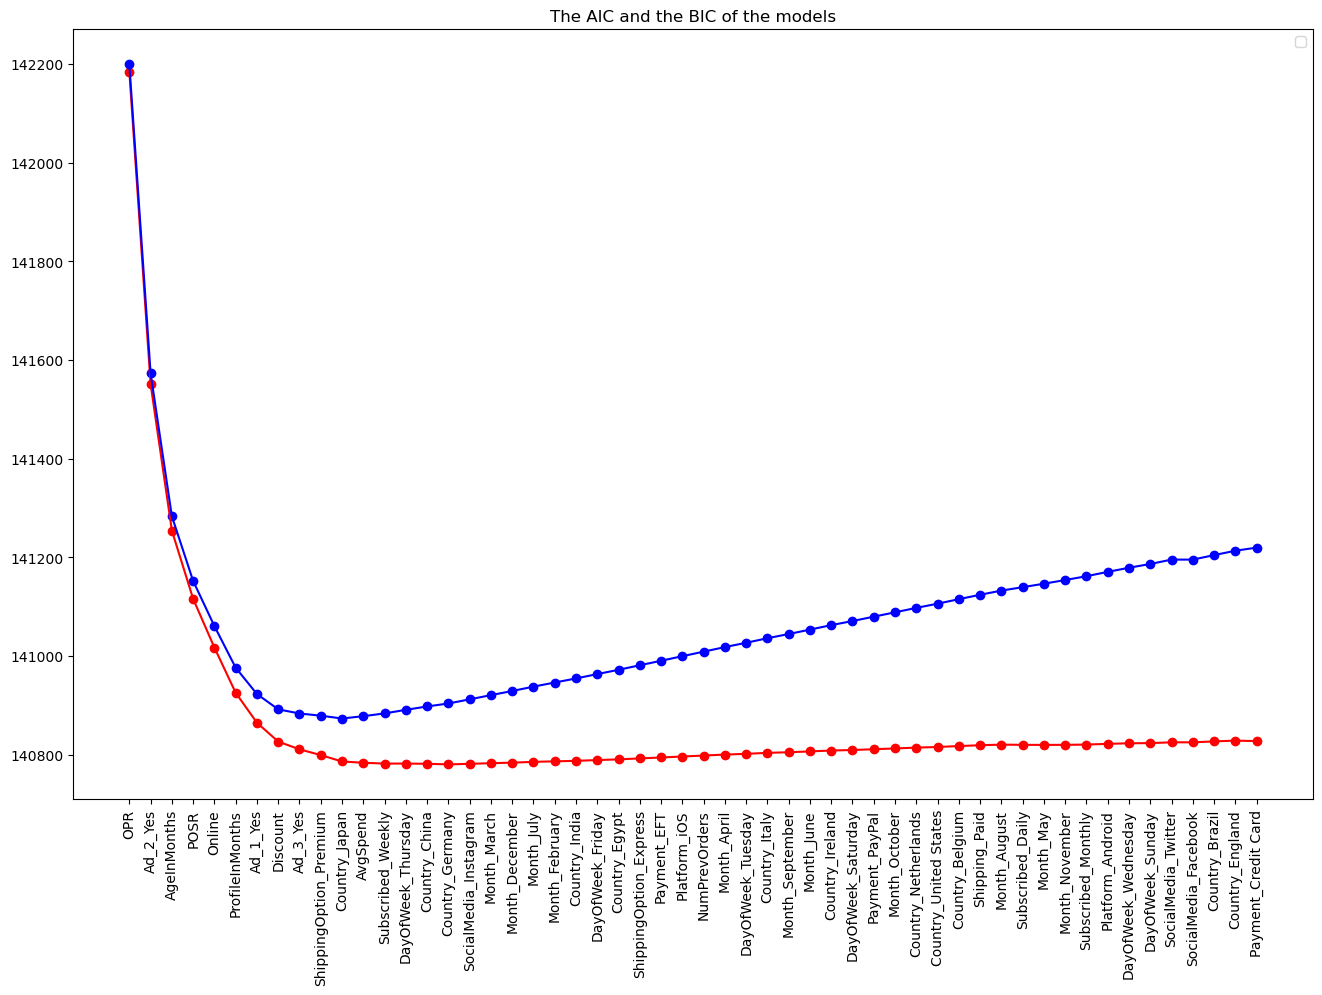

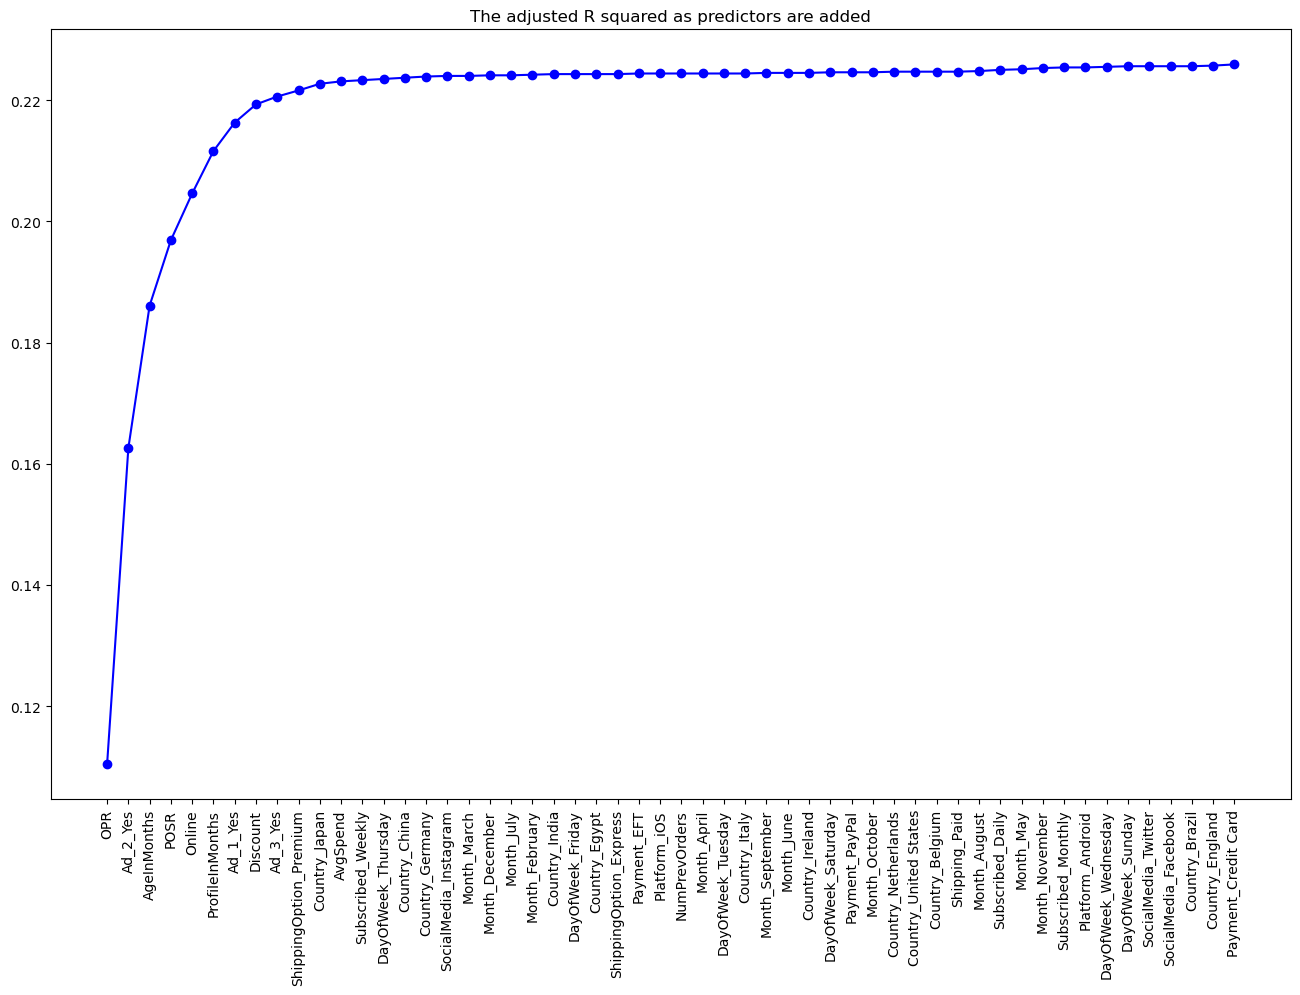

In [59]:
# Showing which variables we selected for our model to improve its performance 
# I will only visualise the variables that I need to show <- AKA the ones we ended up with, then the ones just below it, to justify what we did. 
selected = info[:]

plt.figure(figsize = (16,10))
plt.scatter(np.arange(len(selected)), selected['AIC'], color = 'red')
plt.plot(np.arange(len(selected)), selected['AIC'], color = 'red')

plt.scatter(np.arange(len(selected)), selected['BIC'], color = 'blue')
plt.plot(np.arange(len(selected)), selected['BIC'], color = 'blue')

plt.legend()
plt.title('The AIC and the BIC of the models')
plt.xticks(ticks = np.arange(len(selected)), labels = selected['new_feature'], rotation = 90)
plt.show()

plt.figure(figsize = (16,10))

plt.scatter(np.arange(len(selected)), selected['adj_R'], color = 'blue')
plt.plot(np.arange(len(selected)), selected['adj_R'], color = 'blue')
plt.xticks(ticks = np.arange(len(selected)), labels = selected['new_feature'], rotation = 90)
plt.title('The adjusted R squared as predictors are added')
plt.show()

The `find_best_model` looks through all the models that were built during the forward selection process and selects the model with the highest adjusted R square value.

In [61]:
model = find_best_model(info, X_train, y_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     250.9
Date:                Mon, 23 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:55:13   Log-Likelihood:                -70379.
No. Observations:               10500   AIC:                         1.408e+05
Df Residuals:                   10487   BIC:                         1.409e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
AgeInMonths                0.5507      0.032     17.052      0.000       0.487       0.614
ProfileInMonths           -1.1938      0.123     -9.731      0.000      -1.434      -0.953
AvgSpend                  -0.0435      0.020     -2.130      0.033      -0.083      -0.003
POSR                      11.8364      1.010     11.722      0.000       9.857      13.816
OPR                     -227.3626      9.689    -23.465      0.000    -246.356    -208.369
Online                    -1.2222      0.123     -9.902      0.000      -1.464      -0.980
Discount                  -1.1258      0.195     -5.775      0.000      -1.508      -0.744
ShippingOption_Premium    16.6844      4.380      3.809      0.000       8.098      25.271
Country_Japan             32.1046      8.315      3.861      0.000      15.806      48.403
Ad_1_Yes                  35.3307      4.145      8.523      0.000      27.205      43.456
Ad_2_Yes                  97.0089      4.682     20.722      0.000      87.832     106.186
Ad_3_Yes                  17.8044      4.163      4.276      0.000       9.643      25.965
Intercept                535.6682     18.281     29.301      0.000     499.833     571.503
==============================================================================
Omnibus:                     6534.966   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90863.188
Skew:                           2.783   Prob(JB):                         0.00
Kurtosis:                      16.293   Cond. No.                     4.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Diagnostic plots for the model with the best predictors

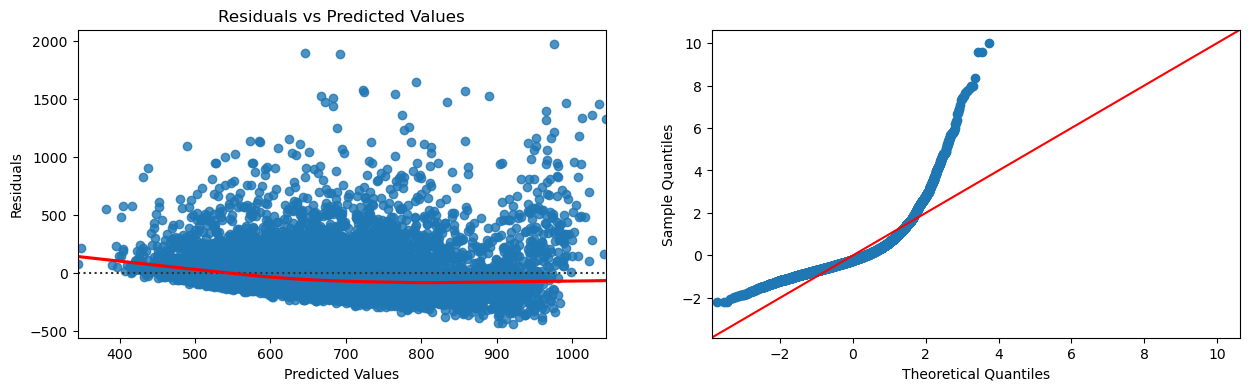

In [62]:
#Looking at how the residuals look
predictors = model.params.index.tolist()

X_test['Intercept'] = 1
selected = X_test[predictors]
predictions = model.predict(selected)

X_train_pred = X_train.copy()
X_train_pred['Intercept'] = 1
X_train_pred = X_train_pred[predictors]
train_pred = model.predict(X_train_pred)

plots(y_test, predictions, train_pred, model.resid)

As we can see from the diagnostic plots, several assumptions of the linear model are being violated, that being: 
- A non constant variance since the residuals are funneling out on the residuals vs the predicted values.
- We also see that there is non-linearity in the residuals of the model. 

In [63]:
# Getting the information that I could get on this model into a table to see if I am acutally getting any better with my model

# placing them into a table 
# Removing outliers to the model 
AIC = model.aic
BIC = model.bic
adj_r = model.rsquared_adj
mse = mean_squared_error(y_test, predictions)

new_entry = pd.DataFrame({
    "mod_desc": ["Base model with the best predictors"],
    "AIC": [round(AIC,4)],
    "BIC": [round(BIC,4)],
    "adj-R": [round(adj_r,4)],
    "test MSE": [round(mse,4)]
})

new_entry
all_models_performance = pd.concat([all_models_performance, new_entry], ignore_index=True)
all_models_performance

mod_desc          AIC          BIC   adj-R  \
0  Base model with the best predictors  140783.7448  140878.1135  0.2222   

     test MSE  
0  35628.4922

#### Transforming the variables
We saw that age had a quadratic relatinship with sales, so we squared age to resemble this relationship in the linear model

In [64]:
#transforming age
X_train['AgeInMonths_squared'] = X_train['AgeInMonths']**2

In [65]:
info = get_models(X_train, y_train)
model = find_best_model(info, X_train, y_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1904.
Date:                Mon, 23 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:57:06   Log-Likelihood:                -65341.
No. Observations:               10500   AIC:                         1.307e+05
Df Residuals:                   10486   BIC:                         1.308e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
AgeInMonths              -33.2164      0.259   -128.350      0.000     -33.724     -32.709
POSR                      11.8878      0.652     18.246      0.000      10.611      13.165
OPR                     -186.3104      4.967    -37.510      0.000    -196.046    -176.574
Online                    -1.2593      0.076    -16.483      0.000      -1.409      -1.110
Discount                  -0.8535      0.121     -7.072      0.000      -1.090      -0.617
Subscribed_Daily          10.7504      4.130      2.603      0.009       2.655      18.846
Subscribed_Weekly         15.5306      4.640      3.347      0.001       6.436      24.625
ShippingOption_Premium    16.0752      2.711      5.929      0.000      10.761      21.389
Country_Japan             17.0988      5.149      3.321      0.001       7.006      27.191
Ad_1_Yes                  31.8445      2.562     12.432      0.000      26.824      36.866
Ad_2_Yes                  96.7936      2.904     33.327      0.000      91.101     102.487
Ad_3_Yes                  15.6612      2.577      6.077      0.000      10.609      20.713
AgeInMonths_squared        0.0377      0.000    130.977      0.000       0.037       0.038
Intercept               7892.7173     57.484    137.302      0.000    7780.037    8005.397
==============================================================================
Omnibus:                     4363.435   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50637.946
Skew:                           1.671   Prob(JB):                         0.00
Kurtosis:                      13.226   Cond. No.                     1.01e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


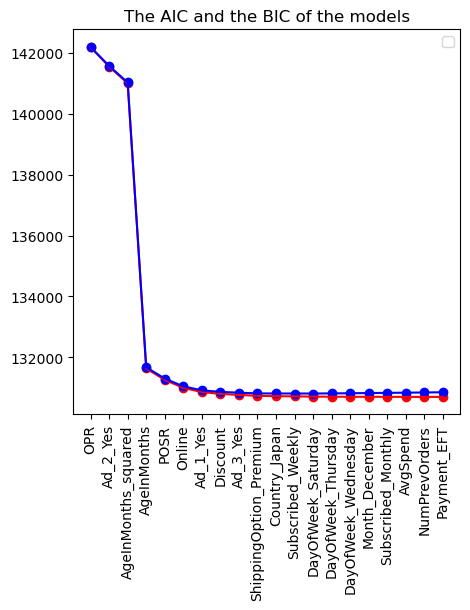

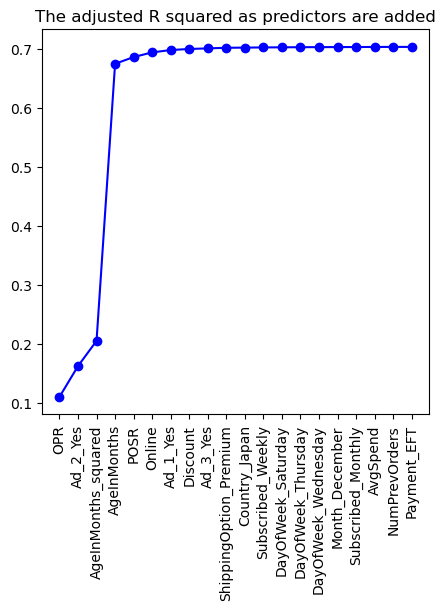

In [66]:
selected = info[:20]

plt.figure(figsize = (5,5))
plt.scatter(np.arange(len(selected)), selected['AIC'], color = 'red')
plt.plot(np.arange(len(selected)), selected['AIC'], color = 'red')

plt.scatter(np.arange(len(selected)), selected['BIC'], color = 'blue')
plt.plot(np.arange(len(selected)), selected['BIC'], color = 'blue')

plt.legend()
plt.title('The AIC and the BIC of the models')
plt.xticks(ticks = np.arange(len(selected)), labels = selected['new_feature'], rotation = 90)
plt.show()

plt.figure(figsize = (5,5))

plt.scatter(np.arange(len(selected)), selected['adj_R'], color = 'blue')
plt.plot(np.arange(len(selected)), selected['adj_R'], color = 'blue')
plt.xticks(ticks = np.arange(len(selected)), labels = selected['new_feature'], rotation = 90)
plt.title('The adjusted R squared as predictors are added')
plt.show()

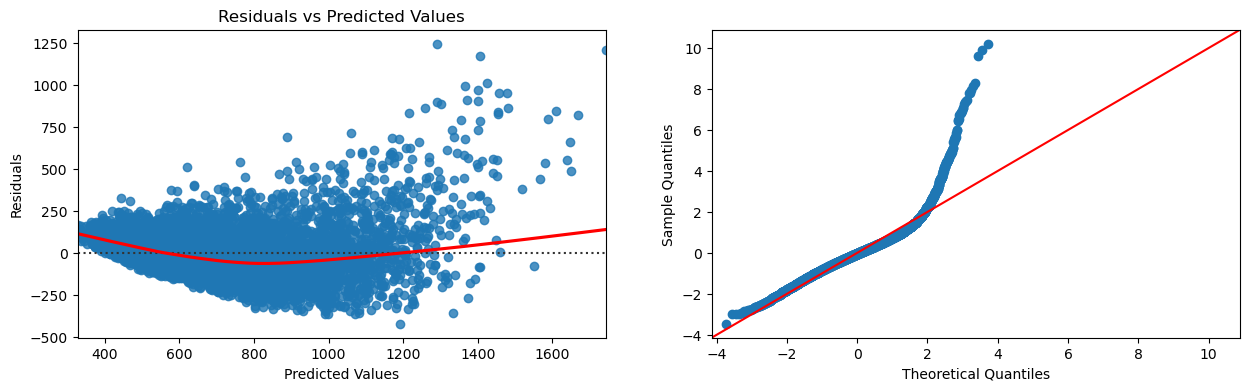

In [67]:
#Looking at how the residuals look
predictors = model.params.index.tolist()

X_test['AgeInMonths_squared'] = X_test['AgeInMonths']**2
X_test['Intercept'] = 1
selected = X_test[predictors]
predictions = model.predict(selected)

X_train_pred = X_train.copy()
X_train_pred['Intercept'] = 1
X_train_pred = X_train_pred[predictors]
train_pred = model.predict(X_train_pred)

plots(y_test, predictions, train_pred, model.resid)

In [68]:
AIC = model.aic
BIC = model.bic
adj_r = model.rsquared_adj
mse = mean_squared_error(y_test, predictions)

new_entry = pd.DataFrame({
    "mod_desc": ["Squared Age"],
    "AIC": [round(AIC,4)],
    "BIC": [round(BIC,4)],
    "adj-R": [round(adj_r,4)],
    "test MSE": [round(mse,4)]
})

new_entry
all_models_performance = pd.concat([all_models_performance, new_entry], ignore_index=True)
all_models_performance

mod_desc          AIC          BIC   adj-R  \
0  Base model with the best predictors  140783.7448  140878.1135  0.2222   
1                          Squared Age  130710.8838  130812.5117  0.7020   

     test MSE  
0  35628.4922  
1  14754.3815

#### Constant Variance
Seeing that the residuals seemed to have a non-constant variance, we decided to log the response variable, sales.

In [ ]:
y_log = y_train.copy()
y_log = np.log(y_log)
log_info = get_models(X_train, y_log)
log_mod = find_best_model(log_info, X_train, y_log)

predictors = log_mod.params.index.tolist()
X_log = X_train.copy()
X_log['Intercept'] = 1
X_log = X_log[predictors]
log_mod = sm.OLS(y_log, X_log).fit()
log_mod.summary()

In [ ]:
#Looking at how the residuals look
predictors = log_mod.params.index.tolist()

X_test['Intercept'] = 1
X_test['AgeInMonths_squared'] = X_test['AgeInMonths']**2

selected = X_test[predictors]
predictions = log_mod.predict(selected)

X_train_pred = X_train.copy()
X_train_pred['Intercept'] = 1

X_train_pred = X_train_pred[predictors]
train_pred = log_mod.predict(X_train_pred)
train_pred = np.exp(train_pred)

plots(y_test, predictions, train_pred, log_mod.resid)

In [ ]:
AIC = log_mod.aic
BIC = log_mod.bic
adj_r = log_mod.rsquared_adj
mse = mean_squared_error(y_test, predictions)

new_entry = pd.DataFrame({
    "mod_desc": ["Squared Age and logged response variable"],
    "AIC": [round(AIC,4)],
    "BIC": [round(BIC,4)],
    "adj-R": [round(adj_r,4)],
    "test MSE": [round(mse,4)]
})

new_entry
all_models_performance = pd.concat([all_models_performance, new_entry], ignore_index=True)
all_models_performance

#### Adding model interactions

In [ ]:
predictors = log_mod.params.index.tolist()
predictors
X_inter = X_train.copy()
X_inter['Intercept'] = 1
X_inter = X_inter[predictors]

X_inter['POSR*Ad_2'] = X_inter['POSR'] * X_inter['Ad_2_Yes']

new_mod = sm.OLS(y_log, X_inter).fit()
new_mod.summary()

In [ ]:
# placing them into a table 
X_inter_test = X_test.copy()
X_inter_test['POSR*Ad_2'] = X_inter_test['POSR'] * X_inter_test['Ad_2_Yes']

X_inter_test['Intercept'] = 1
predictors = new_mod.params.index.tolist()
selected = X_inter_test[predictors]

In [ ]:
#Looking at how the residuals look
predictors = new_mod.params.index.tolist()

X_test_pred = X_test.copy()

X_test_pred['Intercept'] = 1

X_test_pred['POSR*Ad_2'] = X_test_pred['POSR'] * X_test_pred['Ad_2_Yes']

selected = X_test_pred[predictors]
predictions = new_mod.predict(selected)

X_train_pred = X_train.copy()

X_train_pred['Intercept'] = 1

X_train_pred['POSR*Ad_2'] = X_train_pred['POSR'] * X_train_pred['Ad_2_Yes']

X_train_pred = X_train_pred[predictors]
train_pred = new_mod.predict(X_train_pred)
train_pred = np.exp(train_pred)
predictions = np.exp(predictions)
plots(y_test, predictions, train_pred, new_mod.resid)


In [ ]:
# placing them into a table 
# Removing outliers to the model 
AIC = new_mod.aic
BIC = new_mod.bic
adj_r = new_mod.rsquared_adj
mse = mean_squared_error(y_test, predictions)

new_entry = pd.DataFrame({
    "mod_desc": ["Squared Age, log response, interactions"],
    "AIC": [round(AIC,4)],
    "BIC": [round(BIC,4)],
    "adj-R": [round(adj_r,4)],
    "test MSE": [round(mse,4)]
})

new_entry
all_models_performance = pd.concat([all_models_performance, new_entry], ignore_index=True)
all_models_performance

#### Removing Outliers

In [ ]:
outliers = new_mod.get_influence().resid_studentized_internal
total_outliers = np.sum(np.abs(outliers) > 3)
total_outliers

# Removing the outliers
y_out = y_log.copy()
y_out = y_out[~(np.abs(outliers)> 3)]
var = new_mod.params.index.tolist()
X_out = X_inter.copy()
X_out = X_out[~(np.abs(outliers)> 3)]
out_mod = sm.OLS(y_out, X_out).fit()
out_mod.summary()

In [ ]:
#Looking at how the residuals look
predictors = out_mod.params.index.tolist()

X_test_pred = X_test.copy()

X_test_pred['Intercept'] = 1

X_test_pred['POSR*Ad_2'] = X_test_pred['POSR'] * X_test_pred['Ad_2_Yes']

selected = X_test_pred[predictors]
predictions = out_mod.predict(selected)

X_train_pred = X_out.copy()

X_train_pred['Intercept'] = 1

X_train_pred['POSR*Ad_2'] = X_train_pred['POSR'] * X_train_pred['Ad_2_Yes']

X_train_pred = X_train_pred[predictors]
train_pred = out_mod.predict(X_train_pred)
train_pred = np.exp(train_pred)
predictions = np.exp(predictions)
plots(y_test, predictions, train_pred, out_mod.resid)

In [ ]:
# placing them into a table 
# Removing outliers to the model 
AIC = out_mod.aic
BIC = out_mod.bic
adj_r = out_mod.rsquared_adj
mse = mean_squared_error(y_test, predictions)

new_entry = pd.DataFrame({
    "mod_desc": ["Squared Age, log response, interactions, no outliers"],
    "AIC": [round(AIC,4)],
    "BIC": [round(BIC,4)],
    "adj-R": [round(adj_r,4)],
    "test MSE": [round(mse,4)]
})

new_entry
all_models_performance = pd.concat([all_models_performance, new_entry], ignore_index=True)
all_models_performance

#### Removing high leverage points

In [ ]:
leverage = log_mod.get_influence().hat_matrix_diag

threshold = 2 * (X_inter.shape[1]+1)/X_inter.shape[0]
leverage > threshold

X_lev = X_inter.copy()
X_lev = X_lev[leverage < threshold]

y_lev = y_log.copy()
y_lev = y_lev[leverage < threshold]

mod_lev = sm.OLS(y_lev, X_lev).fit()
mod_lev.summary()

In [ ]:
#Looking at how the residuals look
predictors = mod_lev.params.index.tolist()

X_test_pred = X_test.copy()

X_test_pred['Intercept'] = 1

X_test_pred['POSR*Ad_1'] = X_test_pred['POSR'] * X_test_pred['Ad_1_Yes']
X_test_pred['POSR*Ad_2'] = X_test_pred['POSR'] * X_test_pred['Ad_2_Yes']
X_test_pred['POSR*Ad_3'] = X_test_pred['POSR'] * X_test_pred['Ad_3_Yes']

selected = X_test_pred[predictors]
predictions = mod_lev.predict(selected)

X_train_pred = X_lev.copy()

X_train_pred['Intercept'] = 1

X_train_pred['POSR*Ad_1'] = X_train_pred['POSR'] * X_train_pred['Ad_1_Yes']
X_train_pred['POSR*Ad_2'] = X_train_pred['POSR'] * X_train_pred['Ad_2_Yes']
X_train_pred['POSR*Ad_3'] = X_train_pred['POSR'] * X_train_pred['Ad_3_Yes']

X_train_pred = X_train_pred[predictors]
train_pred = mod_lev.predict(X_train_pred)
train_pred = np.exp(train_pred)
predictions = np.exp(predictions)
plots(y_test, predictions, train_pred, mod_lev.resid)

In [ ]:
# placing them into a table 
# Removing outliers to the model 
AIC = mod_lev.aic
BIC = mod_lev.bic
adj_r = mod_lev.rsquared_adj
mse = mean_squared_error(y_test, predictions)

new_entry = pd.DataFrame({
    "mod_desc": ["Squared Age, log response, interactions, no high leverage"],
    "AIC": [round(AIC,4)],
    "BIC": [round(BIC,4)],
    "adj-R": [round(adj_r,4)],
    "test MSE": [round(mse,4)]
})

new_entry
all_models_performance = pd.concat([all_models_performance, new_entry], ignore_index=True)
all_models_performance

#### Getting the high leverage points, and the outliers out of the model

In [ ]:
outliers = mod_lev.get_influence().resid_studentized_internal
total_outliers = np.sum(np.abs(outliers) > 3)
total_outliers


# Removing the outliers
y_out = y_lev.copy()
y_out = y_out[~(np.abs(outliers)> 3)]
var = mod_lev.params.index.tolist()
X_out = X_lev.copy()
X_out = X_out[~(np.abs(outliers)> 3)]
X_out = X_out.drop(columns = ['Country_Egypt','Country_Germany', 'SocialMedia_Instagram'])
out_mod = sm.OLS(y_out, X_out).fit()
out_mod.summary()

In [ ]:
#Looking at how the residuals look
predictors = out_mod.params.index.tolist()

X_test_pred = X_test.copy()

X_test_pred['Intercept'] = 1
X_test_pred['POSR*Ad_2'] = X_test_pred['POSR'] * X_test_pred['Ad_2_Yes']

selected = X_test_pred[predictors]
predictions = out_mod.predict(selected)

X_train_pred = X_out.copy()

X_train_pred['Intercept'] = 1
X_train_pred['POSR*Ad_2'] = X_train_pred['POSR'] * X_train_pred['Ad_2_Yes']

X_train_pred = X_train_pred[predictors]
train_pred = out_mod.predict(X_train_pred)
train_pred = np.exp(train_pred)
predictions = np.exp(predictions)
plots(y_test, predictions, train_pred, out_mod.resid)

In [ ]:
# placing them into a table 
# Removing outliers to the model 
AIC = out_mod.aic
BIC = out_mod.bic
adj_r = out_mod.rsquared_adj
mse = mean_squared_error(y_test, predictions)

new_entry = pd.DataFrame({
    "mod_desc": ["Squared Age, log response, interactions, no high leverage and outliers"],
    "AIC": [round(AIC,4)],
    "BIC": [round(BIC,4)],
    "adj-R": [round(adj_r,4)],
    "test MSE": [round(mse,4)]
})

new_entry
all_models_performance = pd.concat([all_models_performance, new_entry], ignore_index=True)
all_models_performance

#### VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Looking at all the variables that ended up in the final model, and seeing how the VIF of the variables are

vif =pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_out.values, i) for i in range(X_out.shape[1])]

vif.index = X_out.columns
vif

From the VIF of the variables, we can see that the there is little colinearity between the variables, except for the AgeInMonths and the AgeInMonths_squared, which are related to each other. 

## Predictive Model

In [36]:
df_pm.head()

Sales     Month  AgeInMonths  ProfileInMonths Subscribed  NumPrevOrders  \
0  653.29   October          395               18      Daily             11   
1  650.36       May          373                4       None             17   
2  588.88     April          453               15       None             13   
3  616.99  November          409               54       None             42   
4  668.88    August          521                7       None             10   

   AvgSpend  POSR   OPR  Online  ...  ShippingOption Shipping        Country  \
0    162.11   5.4  0.63      61  ...         Premium     Paid   South Africa   
1    189.38   6.1  0.69      22  ...         Express     Paid        England   
2    164.20   7.6  0.55      63  ...        Standard     Paid   South Africa   
3    196.41   5.9  0.77      44  ...         Premium     Free        Belgium   
4    209.05   1.1  0.63      41  ...         Express     Paid  United States   

   Platform         Payment  DayOfWeek Ad_1 Ad_2 Ad_3 SocialMedia  
0  Computer     Credit Card    Tuesday   No  Yes   No        None  
1       iOS  Account Credit    Tuesday   No   No  Yes        None  
2  Computer     Credit Card     Friday   No  Yes   No        None  
3  Computer     Credit Card  Wednesday   No  Yes  Yes        None  
4  Computer     Credit Card     Sunday   No   No  Yes        None  

[5 rows x 21 columns]

#### Outliers
Outliers can greatly impact the knn regression method. So we have decided to trim them instead. 

In [ ]:
df_outliers = df_pm["Sales"].describe()
iqr = df_outliers[6] - df_outliers[4]
iqr_low_bound = df_outliers[4] - 1.5*iqr
iqr_hi_bound = df_outliers[6] + 1.5*iqr

In [ ]:
df_no_outliers = df_pm[(df_pm["Sales"] < iqr_hi_bound) & (df_pm["Sales"] > iqr_low_bound)]
df_no_outliers.head()

#### Standardising the data
To perform KNN Regression, we need standardised data.

In [ ]:
#Drop response variable
df_x = df_no_outliers.drop(["Sales"], axis=1)

In [ ]:
#Get numerical variables for standardisation
df_num = df_x.select_dtypes(exclude=object)
df_num.head()

In [ ]:
# Fit the standardisation
scalar = StandardScaler()
scalar.fit(df_num)
# Apply standardisation to the variables
scaled_variables = scalar.transform(df_num)
df_scaled = pd.DataFrame(scaled_variables, columns = df_num.columns)
df_scaled.shape

#### Dummy Variables
Encoding our categorical variables into numerical dummy variables in order to use them in KNN Regression 

In [ ]:
df_cat = df_x.select_dtypes(include=object)

In [ ]:
df_scaled["Month"] = df_cat["Month"]
df_scaled["Subscribed"] = df_cat["Subscribed"]
df_scaled["ShippingOption"] = df_cat["ShippingOption"]
df_scaled["Shipping"] = df_cat["Shipping"]
df_scaled["Country"] = df_cat["Country"]
df_scaled["Platform"] = df_cat["Platform"]
df_scaled["Payment"] = df_cat["Payment"]
df_scaled["DayOfWeek"] = df_cat["DayOfWeek"]
df_scaled["Ad_1"] = df_cat["Ad_1"]
df_scaled["Ad_2"] = df_cat["Ad_2"]
df_scaled["Ad_3"] = df_cat["Ad_3"]
df_scaled["SocialMedia"] = df_cat["SocialMedia"]
df_scaled.head()

In [ ]:
def make_dummies(df, colname, baseline):
    assert any(df.columns == colname), f'The column name {colname} is not one of the columns. Options: {list(df.columns)}'
    groups = df[colname].unique()
    assert len(groups)>1, f'The variable {column} must have at least two unique groups'
    assert any(groups == baseline), f'The group {baseline} is not one of the levels. Options: {groups}'
    col = df[colname]
    col_dummies = pd.get_dummies(col, prefix=colname)
    bline_col = colname + '_' + str(baseline)
    idx_keep_cols = np.where(col_dummies.columns != bline_col)[0]
    dummies = col_dummies.iloc[:,idx_keep_cols]
    dfnew = df.copy()
    dfnew.drop(columns=colname, inplace=True)
    dfnew = pd.concat([dfnew, dummies], axis=1)
    return dfnew

df_scaled = make_dummies(df_scaled, 'Ad_1', baseline = 'No')
df_scaled = make_dummies(df_scaled, 'Ad_2', baseline = 'No')
df_scaled = make_dummies(df_scaled, 'Ad_3', baseline = 'No')
df_scaled = make_dummies(df_scaled, 'ShippingOption', baseline = 'Standard')
df_scaled = make_dummies(df_scaled, 'Platform', baseline = 'Computer')
df_scaled = make_dummies(df_scaled, 'Payment', baseline = 'EFT')
df_scaled = make_dummies(df_scaled, 'Subscribed', baseline = 'None')
df_scaled = make_dummies(df_scaled, 'SocialMedia', baseline = 'None')
df_scaled = make_dummies(df_scaled, 'Shipping', baseline = 'Free')
df_scaled = make_dummies(df_scaled, 'Month', baseline = 'January')
df_scaled = make_dummies(df_scaled, 'Country', baseline = 'South Africa')
df_scaled = make_dummies(df_scaled, 'DayOfWeek', baseline = 'Monday')
df_scaled.head()

#### Dimensionality Reduction
To reduce the curse of dimensionality with knn, we looked at the random forest method to help us subset features to use for knn regression.

#### Random Forest Feature Selection

In [ ]:
x = df_scaled
y = df_no_outliers["Sales"]

In [ ]:
# Make train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 24)

In [ ]:
#Fit the RandomForestRegressor method
rfr_model = RandomForestRegressor(random_state = 1, max_depth=10)
rfr_model.fit(X_train, y_train)

In [ ]:
#Plot 
features = x.columns
importances = rfr_model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Sci-Kit Learn SelectFromModel

In [ ]:
feature = SelectFromModel(RandomForestRegressor())
feature.fit(X_train, y_train)

In [ ]:
selected_feat= x.columns[(feature.get_support())]
len(selected_feat) 

In [ ]:
print(selected_feat)

#### Dataframes for different variable selection

In [ ]:
#SciKit Learn SelectFromModel
df_3 = pd.DataFrame({"AgeInMonths": df_scaled["AgeInMonths"], 
                        "NumPrevOrders": df_scaled["NumPrevOrders"],
                       "ProfileInMonths": df_scaled["ProfileInMonths"],
                        "AvgSpend": df_scaled["AvgSpend"],
                          "POSR": df_scaled["POSR"],
                       "OPR": df_scaled["OPR"],
                       "Online": df_scaled["Online"]
                      })
                    
# Make train and test data
x3 = df_3
y3 = df_no_outliers["Sales"]

X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state = 24)

#### Choosing hyperparameter k for different varaibles selection
1 MSE of different k-values <br>
2 GridSearch

In [ ]:
k_values = np.arange(1, 40)
test_errors = []
train_errors = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X3_train, y3_train)
    
    test_pred = knn.predict(X3_test)
    train_pred = knn.predict(X3_train)
    
    test_error = mean_squared_error(y3_test, test_pred)
    test_errors.append(test_error)
    
    train_error = mean_squared_error(y3_train, train_pred)
    train_errors.append(train_error)
    
train_errors = np.array(train_errors)
test_errors = np.array(test_errors)
    
plt.figure(figsize=(10,6))
plt.plot(k_values, test_errors, marker = 'o', linestyle='-', color="blue", label="test")
plt.plot(k_values, train_errors, marker = 'o', linestyle='-', color="green", label="train")
plt.title("Test Error vs K-Values for SelectFromModel")
plt.xlabel("K Values")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show

In [ ]:
parameters = {'n_neighbors': np.arange(1, 50)}
cv = GridSearchCV(KNeighborsRegressor(), param_grid=parameters, scoring = 'neg_mean_squared_error', cv = 5)
cv.fit(X3_train, y3_train)

In [ ]:
cv.best_params_

In [ ]:
knn13 = KNeighborsRegressor(n_neighbors=23, metric = "minkowski")
knn13.fit(X3_train, y3_train)

In [ ]:
preds3 = knn13.predict(X3_test)

In [ ]:
mse3 = mean_squared_error(y3_test, preds3)
mse3

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y3_test, preds3)
plt.title("Actual Values Against Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()